<a href="https://colab.research.google.com/github/VivianQian19/Content-Analysis-2020/blob/master/final_project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment and dependencies



In [0]:
#install all the dependencies here
!pip install jieba

In [0]:
!pip install scipy

In [0]:
!pip install nltk

In [0]:
#!pip install hanlp

In [0]:
#Import necessary packages

#for final project
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
# import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas as pd #gives us DataFrames
# import docx #reading MS doc files, install as `python-docx` #install later if needed
import string
#import hanlp
#Stuff for pdfs
#Install as `pdfminer2`
# import pdfminer.pdfinterp
# import pdfminer.converter
# import pdfminer.layout
# import pdfminer.pdfpage

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook

#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition # for PCA
import sklearn.metrics
import sklearn.metrics.pairwise # For cosine similarity
import sklearn.manifold # for T-SNE

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json
import jieba
import spacy
import copy
import nltk

In [0]:
#mount google drive 
from google.colab import drive
drive.mount('/content/drive')
# example code that read from google drive
# with open('/gdrive/My Drive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat '/gdrive/My Drive/foo.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# get Chinese font for plotting in matlib
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip"
!unzip "NotoSansCJKsc-hinted.zip"
!mv NotoSansCJKsc-Regular.otf /usr/share/fonts/truetype/
import matplotlib.font_manager as matfm

font_path= '/usr/share/fonts/truetype/NotoSansCJKsc-Regular.otf'
fontprop = matfm.FontProperties(fname=font_path, size = 15)

--2020-03-31 00:56:26--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKsc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.182.128, 2607:f8b0:4001:c0a::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121063622 (115M) [application/zip]
Saving to: ‘NotoSansCJKsc-hinted.zip.2’

NotoSansCJKsc-hinte 100%[===================>] 115.46M   129MB/s    in 0.9s    

2020-03-31 00:56:27 (129 MB/s) - ‘NotoSansCJKsc-hinted.zip.2’ saved [121063622/121063622]

Archive:  NotoSansCJKsc-hinted.zip
replace LICENSE_OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKsc-Black.otf  
  inflating: NotoSansCJKsc-Bold.otf  
  inflating: NotoSansCJKsc-DemiLight.otf  
  inflating: NotoSansCJKsc-Light.otf  
  inflating: NotoSansCJKsc-Medium.otf  
  i

# Import and Clean Data

In [0]:
#def openjsonfile()
# for jsonfile in sina-json:
      #with open('')
#"/content/drive/My Drive/final project/sina_export_3_18"
wd = "/content/drive/My Drive/final project/"

In [0]:
with open(wd + "sina_export_3_18/accounts.json") as accounts_data_file:
    accounts_data = pd.read_json(accounts_data_file,lines=True)
    accounts_df = pd.DataFrame(accounts_data)
    

In [0]:
accounts_df.shape #I used 62 Weibo accounts as crawlers to scrape Weibo

(62, 4)

In [0]:
with open(wd + 'sina_export_3_18/information.json') as info_data_file:
    info_data = pd.read_json(info_data_file,lines=True)
    info_df = pd.DataFrame(info_data)
 

I have selected 16 Weibo accounts as starting points for scraping. These IDs are selected by me from across different occupations and industries based on this website (https://bang.weibo.com/?display=0&retcode=6102) that lists the most influential weibo accounts by topic and time period.



## user_ids


In [0]:
info_df.head(16)

,_id,crawl_time,nick_name,gender,province,brief_introduction,birthday,vip_level,authentication,labels,tweets_num,follows_num,fans_num,city,sex_orientation
0,2803301701,{'$numberInt': '1583866630'},人民日报,男,北京,人民日报法人微博。参与、沟通、记录时代。,1948-06-15,6级,《人民日报》法人微博,人民日报,{'$numberInt': '113257'},{'$numberInt': '3048'},{'$numberInt': '113920377'},NaN,NaN
1,1699432410,{'$numberInt': '1583866630'},新华视点,男,北京,“新华视点”是新华社官方微博，重大新闻权威首发平台。,1931-11-07,6级,新华社法人微博,"主流媒体,中央媒体,新华通讯社",{'$numberInt': '120105'},{'$numberInt': '2970'},{'$numberInt': '90732111'},NaN,NaN
2,1980768563,{'$numberInt': '1583876276'},霜叶,男,海外,吃瓜群众,2000-08-08,7级,知名互联网资讯博主,"影评,移动互联网,商业",{'$numberInt': '13556'},{'$numberInt': '1250'},{'$numberInt': '1815669'},NaN,NaN
3,2656274875,{'$numberInt': '1583876274'},央视新闻,男,北京,“央视新闻”微博是中央电视台新闻中心官方微博，是央视重大新闻、突发事件、重点报道的首发平台。,2012-11-01,6级,中央电视台新闻中心官方微博,NaN,{'$numberInt': '123092'},{'$numberInt': '2696'},{'$numberInt': '106749764'},NaN,NaN
4,1700162184,{'$numberInt': '1583890176'},李小萌,女,北京,商务合作请联系vx: xmdpym,处女座,6级,媒体人,NaN,{'$numberInt': '6948'},{'$numberInt': '1052'},{'$numberInt': '11642151'},东城区,NaN
5,162782539,{'$numberInt': '1583890176'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1989660417,{'$numberInt': '1583890176'},胡锡进,男,北京,胡锡进，一个“复杂中国”的报道者。,01-01,7级,《环球时报》总编辑胡锡进,NaN,{'$numberInt': '8148'},{'$numberInt': '270'},{'$numberInt': '22124721'},朝阳区,NaN
7,1483330984,{'$numberInt': '1583890177'},侯宁,男,北京,人称＂空军司令＂，财富苍生之醉观者。长篇小说《财富苍生-槐花蛇》作者，侯宁微店https:/...,NaN,7级,独立财经观察家，时评家、社会学者、职业投资人 微博签约自媒体,"槐花蛇,财富苍生,股市趋势",{'$numberInt': '244211'},{'$numberInt': '721'},{'$numberInt': '3907117'},东城区,NaN
8,1665808371,{'$numberInt': '1583890177'},平民王小石,男,广东,【反台独】自己若坚持光明，中国便少分黑暗！,0001-00-00,7级,头条文章作者,"新闻,网络,文字",{'$numberInt': '21553'},{'$numberInt': '3001'},{'$numberInt': '6242944'},深圳,NaN
9,1749127163,{'$numberInt': '1583890177'},雷军,男,北京,小米董事长，金山软件董事长。业余爱好是天使投资。,0001-00-00,7级,小米创办人，董事长兼CEO；金山软件董事长；天使投资人。,"天使投资,小米手机,我们都爱用米聊",{'$numberInt': '10566'},{'$numberInt': '1263'},{'$numberInt': '22697812'},海淀区,NaN


In [0]:
print("Total number of Weibo accounts in the corpus is: ")
print(len(info_df)) 

Total number of Weibo accounts in the corpus is: 
16


In [0]:
drop_index = []
for index, row in info_df.iterrows():
  if row['_id'] == 162782539 or row['_id'] == 2656274875 or row['_id'] == 3945917804 or row['_id'] == 1583866630 or row ['_id'] == 1699432410:
    drop_index.append(index)
new_info_df = info_df.drop(drop_index, axis=0)
new_info_df

,_id,crawl_time,nick_name,gender,province,brief_introduction,birthday,vip_level,authentication,labels,tweets_num,follows_num,fans_num,city,sex_orientation
0,2803301701,{'$numberInt': '1583866630'},人民日报,男,北京,人民日报法人微博。参与、沟通、记录时代。,1948-06-15,6级,《人民日报》法人微博,人民日报,{'$numberInt': '113257'},{'$numberInt': '3048'},{'$numberInt': '113920377'},NaN,NaN
2,1980768563,{'$numberInt': '1583876276'},霜叶,男,海外,吃瓜群众,2000-08-08,7级,知名互联网资讯博主,"影评,移动互联网,商业",{'$numberInt': '13556'},{'$numberInt': '1250'},{'$numberInt': '1815669'},NaN,NaN
4,1700162184,{'$numberInt': '1583890176'},李小萌,女,北京,商务合作请联系vx: xmdpym,处女座,6级,媒体人,NaN,{'$numberInt': '6948'},{'$numberInt': '1052'},{'$numberInt': '11642151'},东城区,NaN
6,1989660417,{'$numberInt': '1583890176'},胡锡进,男,北京,胡锡进，一个“复杂中国”的报道者。,01-01,7级,《环球时报》总编辑胡锡进,NaN,{'$numberInt': '8148'},{'$numberInt': '270'},{'$numberInt': '22124721'},朝阳区,NaN
7,1483330984,{'$numberInt': '1583890177'},侯宁,男,北京,人称＂空军司令＂，财富苍生之醉观者。长篇小说《财富苍生-槐花蛇》作者，侯宁微店https:/...,NaN,7级,独立财经观察家，时评家、社会学者、职业投资人 微博签约自媒体,"槐花蛇,财富苍生,股市趋势",{'$numberInt': '244211'},{'$numberInt': '721'},{'$numberInt': '3907117'},东城区,NaN
8,1665808371,{'$numberInt': '1583890177'},平民王小石,男,广东,【反台独】自己若坚持光明，中国便少分黑暗！,0001-00-00,7级,头条文章作者,"新闻,网络,文字",{'$numberInt': '21553'},{'$numberInt': '3001'},{'$numberInt': '6242944'},深圳,NaN
9,1749127163,{'$numberInt': '1583890177'},雷军,男,北京,小米董事长，金山软件董事长。业余爱好是天使投资。,0001-00-00,7级,小米创办人，董事长兼CEO；金山软件董事长；天使投资人。,"天使投资,小米手机,我们都爱用米聊",{'$numberInt': '10566'},{'$numberInt': '1263'},{'$numberInt': '22697812'},海淀区,NaN
10,1280463227,{'$numberInt': '1583890178'},罗志渊,男,香港,合作联系：luozhiyuan@vip.126.com,NaN,7级,学者、作家、诗人、批评家 微博签约自媒体,"好书,历史,看电影",{'$numberInt': '133546'},{'$numberInt': '2993'},{'$numberInt': '8343133'},NaN,异性恋
11,1968758563,{'$numberInt': '1583890178'},李佳琦Austin,男,上海,淘宝微淘搜索🔍李佳琦Austin，每天晚上八点十五见哦 商务vx：13482043027 联...,1992-06-07,6级,美ONE签约达人 知名美妆博主 时尚美妆视频自媒体,NaN,{'$numberInt': '1021'},{'$numberInt': '304'},{'$numberInt': '12540129'},长宁区,NaN
12,1781312093,{'$numberInt': '1583890179'},李淼李三水,男,北京,专写杀人放火的李淼。一切商务及合作事宜，请联系经纪人@白毛毛，邮箱baimaomao@buk...,摩羯座,5级,头条文章作者,NaN,{'$numberInt': '7438'},{'$numberInt': '1064'},{'$numberInt': '736076'},NaN,NaN


In [0]:
len(new_info_df)

12

In [0]:
#convert json files to pandas dataframes
with open(wd + 'sina_export_3_18/tweets.json') as tweets_data_file:
    tweets_data = pd.read_json(tweets_data_file,lines=True)
    tweets_df = pd.DataFrame(tweets_data)
    

In [0]:
tweets_df.shape # In total, I have 28116 samples of tweets

(28116, 14)

In [0]:
# clean the data frame & will need to use like_num and repost_num column for network centrality measure

tweets_df['crawl_time']=tweets_df['crawl_time'].apply(lambda x: x['$numberInt'])
tweets_df['like_num']=tweets_df['like_num'].apply(lambda x: x['$numberInt'])
tweets_df['repost_num']=tweets_df['repost_num'].apply(lambda x: x['$numberInt'])
tweets_df['comment_num']=tweets_df['comment_num'].apply(lambda x: x['$numberInt'])

In [0]:
#convert json files to pandas dataframes
with open(wd + 'sina_export_3_18/comments.json') as comments_data_file:
    comments_data = pd.read_json(comments_data_file,lines=True)
    comments_df = pd.DataFrame(comments_data)
    

In [0]:
comments_df.shape # total number of comments in the corpus is 27592

(27592, 7)

In [0]:
# clean the data frame & will need to use like_num and repost_num column for network centrality measure
comments_df['crawl_time']=comments_df['crawl_time'].apply(lambda x: x['$numberInt'])
comments_df['like_num']=comments_df['like_num'].apply(lambda x: x['$numberInt'])

In [0]:
comments_df.sample()

,_id,crawl_time,weibo_url,comment_user_id,content,like_num,created_at
14038,C_4236825612387091,1584212836,https://weibo.com/1483330984/GfrXO6Mva,2010767423,9岁神童！,0,2018-05-06 23:43:25


The following content analysis will mostly use the tweets and comments dataframe as they contain the majority of texts posted by Weibo users. 

In [0]:
tweets_df.loc[:,"content"][:2000:10]

0       【#6种情况不应该进行消毒#】中国疾控中心研究员张流波表示，①不对室外环境大规模消毒；②雨雪...
10      【#韩国新增477例累计4812例#】韩国中央防疫对策本部3日通报，截至3日0时，韩国较2日...
20      【送别！#武汉市中心医院梅仲明医生感染去世#】武汉中心医院微信公号发布公告：武汉市中心医院眼...
30      【#韩国新增374例新冠肺炎#，#韩国累计确诊新冠肺炎超5000例#】韩国中央防疫对策本部3...
40      【#宅家日久颈痛肩背痛怎么办#？】#骨科主任示范缓解肩颈背痛动作#，戳↓↓转发，赶紧试试吧！...
                              ...                        
1950            奥巴马打响了“围剿中国”的令枪！  http://sinaurl.cn/h9yoM
1960           楼市已成中国经济的“掩体毁灭者”！  http://sinaurl.cn/hSis2
1970            哥本哈根在见证人类的短视和自私！  http://sinaurl.cn/h6YmO
1980                   [可怜]//@华沙队员:太他妈的厉害了！现场有人犯心脏病了吧[允悲]
1990                                           感觉可以卖画为生了…
Name: content, Length: 200, dtype: object

In [0]:
comments_df.loc[:,"content"][:100:10]

0                        希望中国病例快些清零！！中国加油！！
10              大家一定不能掉以轻心，还要继续坚持努力，做好自我防护🙏
20                                  恭喜关门大吉！
30                                    大大辛苦了
40                                  工资应同工同酬
50                   我只知道 我和我周边的朋友的可支配收入在减少
60                    还有好多方面都要这样.如手机,电脑,医疗.
70                                       偶吐
80                                 怎么感觉这么刺耳
90    城市的上好的学校，在城里的流动人口子女上差学校，不还是一样啊！也就是空谈！
Name: content, dtype: object

# Cleaning


Two of my dataframe include texts that contain data for further analysis of Chinese nationalism. However, one of the dataframe has to do with comments of the scraped post. I think it makes little sense to do analysis on the comments outside of the context of the original posts that they respond to.

In [0]:
tweets_df.loc[:,"content"][300:450:10]

300    #CCTV体坛盛典#【此刻，向所有为国争光的中国运动员致敬！】2015CCTV体坛风云人物颁...
310    【深圳追查“问题跑道” 6家施工及监理单位被立案调查】近日经深圳福田区住建局调查，美莲小学等...
320    【云南一民警在抗震救灾途中遭余震不幸遇难[泪]】近日，云南巧家县公安局49岁的民警杨洪仟，在...
330    【他们也默默守护烈士墓】①江苏徐家：1945年徐建武开始为两无名抗日烈士守墓，其儿孙先后接班...
340    【忘带手机了，我们还能做什么？】晨起，爱人第一时间拿起手机；朋友聚会，各自看手机；吃饭喝茶前...
350    【肇事逃逸女司机咬伤民警 “生猛”！】甘肃兰州一名女司机在人行道上驾车，撞倒路人后由于车速较...
360    #主播说联播#【期待武汉整体出舱】今天，#习近平在武汉考察新冠肺炎疫情防控工作#，今天，武汉...
370    【广东东莞中堂镇发生气体中毒事故 致7死2伤】15日晚，广东省东莞市中堂镇一纸业公司发生气体...
380    #世界杯来啦#【震撼！球迷加油助威有啥绝招？[并不简单]】2018俄罗斯世界杯激战正酣，球迷...
390                                    解放军来比tm当地谁吹牛逼都有用。
400                                        夕阳 绿洲 [组图共2张]
410                                歌挺好，唱得也挺好，但是不感动，没搭配上。
420    【小伙骑动感单车1小时 尿出“酱油尿” 可能肾衰！】西安24岁小伙阿明有点胖，为了找对象想减...
430    #寻找最美医生#【妙手仁心 给上万孩子送去生之希望】刘迎龙是一名治疗儿童先心病的专家。每天早...
440    【[话筒]重度霾来了！快把口罩拿出来[生病]】今天气象台发布黄色预警：下午到夜间北京大部分地...
Name: content, dtype: object

In [0]:
# look at a few sample tweets to find some features for cleaning
print(tweets_df.loc[:,"content"][390])
print(tweets_df.loc[:,"content"][420])
print(tweets_df.loc[:,"content"][420][0])
print(tweets_df.loc[:,"content"][300])
print(tweets_df.loc[:,"content"][430])
print(tweets_df.loc[:,"content"][360])
print(tweets_df.loc[:,"content"][360][0])


解放军来比tm当地谁吹牛逼都有用。
【小伙骑动感单车1小时 尿出“酱油尿” 可能肾衰！】西安24岁小伙阿明有点胖，为了找对象想减肥，第一次去健身房骑了1小时动感单车，不料隔天起不了床，尿液还变酱油色。医院诊断为横纹肌溶解综合征，是剧烈运动过量所致，可能出现急性肾衰竭。医生提醒，运动要循序渐进，把握度！小伙第一次骑动感单车 运动过量惊现“酱油尿”
【
#CCTV体坛盛典#【此刻，向所有为国争光的中国运动员致敬！】2015CCTV体坛风云人物颁奖盛典揭晓了十个奖项。恭喜周琦、熊朝忠、北京马拉松组委会、苏炳添、祁顺、田径男子4x100、郎平、中国女排、刘虹、宁泽涛！同时，也向所有超越极限、超越梦想的中国运动员致敬！汗水与拼搏，换来所有中国人的骄傲！ [组图共9张]
#寻找最美医生#【妙手仁心 给上万孩子送去生之希望】刘迎龙是一名治疗儿童先心病的专家。每天早六点半，他都会开放患儿绿色通道，这也使他几乎成了全院出诊最早的医生。在他的妙手下，已经有近13000个孩子找回生活希望。他说，孩子把生命托付给我们，这份责任无比重大。点
#主播说联播#【期待武汉整体出舱】今天，#习近平在武汉考察新冠肺炎疫情防控工作#，今天，武汉方舱医院已全部休舱！方舱医院休舱，见证的是生命之光，看到的是胜利曙光。但总书记也提醒大家，要保持头脑清醒，坚持到底。大家再加把劲，争取让武汉整体出舱！出舱了，扑面而来的就是春风花草香，也是当下最美的春光。 央视新闻的微博视频
#


It seems all the posts that start with "【" or "#" are reposts instead of original posts by the Weibo user. There seems to be no comments that comes with reposts, at least in the above examples. I will remove these retweets and see how many posts are left. 

In [0]:
#first, check and drop duplicate posts/rows
tweets_df.drop_duplicates(inplace=True)
#tweets_df.head()

In [0]:
tweets_df.shape # it seems the corpus contains no duplicates

(28116, 14)

## drop rows 

Since some of the user ID's in my corpus are owned by institutes or organizations or companies I will drop these tweets from my corpus since what I'm interested in are real people's online discourse. 

In [0]:
# iterate rows, for r[column][0] == "【" or "#", drop the row 
# drop the rows with user_id = 1627825392, 2656274875, 3945917804, 1583866630, 1699432410
# if row['user_id'] == 1627825392 or row['user_id'] == 2656274875  or row['user_id'] == 3945917804, or row['user_id'] == 1583866630

drop_index = []
for index, row in tweets_df.iterrows():
    if len(row['content'])>0:
        if row['content'][0] == "【" or row['content'][0] == "#" or row['user_id'] == 1627825392 or row['user_id'] == 2656274875 or row['user_id'] == 3945917804 or row['user_id'] == 1583866630 or row ['user_id'] == 1699432410:
            drop_index.append(index)             

In [0]:
new_tweets_df = tweets_df.drop(drop_index, axis=0) #By default the original DataFrame is not changed, and a new DataFrame is returned.

In [0]:
len(new_tweets_df) # I dropped around 5264 tweets 

22800

In [0]:
type(new_tweets_df['user_id'][11665])

numpy.int64

## create a new column for year for doc2vec


In [0]:
type(new_tweets_df['created_at'][4620]) # the objects stored under 'created_at' are timestamp objects and I need to extract the year

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
new_tweets_df['created_at'][4620].year

2020

In [0]:
#create a new column for year
new_tweets_df['year'] = new_tweets_df['created_at'].apply(lambda x: x.year)


In [0]:
any(new_tweets_df['user_id'] == 1627825392)

False

In [0]:
any(new_tweets_df['user_id'] == 2656274875)

False

In [0]:
any(new_tweets_df['user_id'] == 3945917804)

False

In [0]:
any(new_tweets_df['user_id'] == 1583866630)

False

## reset index & add columns nick_name, gender, province


In [0]:
new_tweets_df = new_tweets_df.reset_index(drop=True)

In [0]:
new_tweets_df.head()

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year
0,1980768563_Iw9dilFaJ,1583877534,https://weibo.com/1980768563/Iw9dilFaJ,1980768563,2020-02-27 16:37:00,真香警告,102,5,22,NaN,对了，记得关注@大师没有钱 还有工x号：浮云,NaN,NaN,NaN,2020
1,1980768563_Iy1lKeTGg,1583877534,https://weibo.com/1980768563/Iy1lKeTGg,1980768563,2020-03-10 00:16:00,iPhone XS Max,304,5,49,NaN,明天的更新已经差不多5000字了……还要等明天更新数据以及补充更多信息。2月24号第一条连1...,NaN,NaN,NaN,2020
2,1980768563_Iy1iKDvHR,1583877534,https://weibo.com/1980768563/Iy1iKDvHR,1980768563,2020-03-10 00:09:00,iPhone XS Max,266,609,15,https://m.weibo.cn/s/video/show?object_id=1034...,谢谢//@打奥特曼de小怪兽:谢谢你们的奉献//@LumiereNoire: 这个视频真的很...,NaN,https://weibo.cn/comment/Iy0c8sbD4?rl=1#cmtfrm,NaN,2020
3,1980768563_Iy19ymfjm,1583877534,https://weibo.com/1980768563/Iy19ymfjm,1980768563,2020-03-10 23:46:00,iPhone XS Max,607,30,83,NaN,欧洲尾盘反弹了！//@八大山债人:原来是你？！。。。//@霜叶:艹，这都能跳水？从+3%跌到...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020
4,1980768563_Iy13sbx39,1583877534,https://weibo.com/1980768563/Iy13sbx39,1980768563,2020-03-10 23:31:00,iPhone XS Max,499,77,87,NaN,艹，这都能跳水？从+3%跌到-2%了[汗]//@古月子大怪兽:[允悲]这口毒奶，欧洲三大股没...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020


In [0]:
# create a dictionary from info_df {'_id': nickname1, gender1, province1, labels1, '_id': nickname2, gender2, province2, labels2, ... }
user_info = {}
for index, row in info_df.iterrows():
  user_info[row['_id']] = [row['nick_name'], row['gender'], row['province'], row['labels']]
print(user_info)

{2803301701: ['人民日报', '男', '北京', '人民日报'], 1699432410: ['新华视点', '男', '北京', '主流媒体,中央媒体,新华通讯社'], 1980768563: ['霜叶', '男', '海外', '影评,移动互联网,商业'], 2656274875: ['央视新闻', '男', '北京', nan], 1700162184: ['李小萌', '女', '北京', nan], 162782539: [nan, nan, nan, nan], 1989660417: ['胡锡进', '男', '北京', nan], 1483330984: ['侯宁', '男', '北京', '槐花蛇,财富苍生,股市趋势'], 1665808371: ['平民王小石', '男', '广东', '新闻,网络,文字'], 1749127163: ['雷军', '男', '北京', '天使投资,小米手机,我们都爱用米聊'], 1280463227: ['罗志渊', '男', '香港', '好书,历史,看电影'], 1968758563: ['李佳琦Austin', '男', '上海', nan], 1781312093: ['李淼李三水', '男', '北京', nan], 1792951112: ['X玖少年团肖战DAYTOY', '男', '重庆', '得瑟,天秤座'], 1263406744: ['司马南', '男', '北京', '读书,幽默,自由'], 3945917804: ['毒舌电影', '男', '广东', '看电影,影评,电影']}


In [0]:
user_info[2803301701][0]

'人民日报'

In [0]:
user_info.keys()

dict_keys([2803301701, 1699432410, 1980768563, 2656274875, 1700162184, 162782539, 1989660417, 1483330984, 1665808371, 1749127163, 1280463227, 1968758563, 1781312093, 1792951112, 1263406744, 3945917804])

In [0]:
# create new columns nick_name, gender, province, label
new_tweets_df['nick_name'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][0])
new_tweets_df['gender'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][1])
new_tweets_df['province'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][2])
new_tweets_df['label'] = new_tweets_df['user_id'].apply(lambda x: user_info[x][3])



In [0]:
new_tweets_df.head(5)

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label
0,1980768563_Iw9dilFaJ,1583877534,https://weibo.com/1980768563/Iw9dilFaJ,1980768563,2020-02-27 16:37:00,真香警告,102,5,22,NaN,对了，记得关注@大师没有钱 还有工x号：浮云,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业"
1,1980768563_Iy1lKeTGg,1583877534,https://weibo.com/1980768563/Iy1lKeTGg,1980768563,2020-03-10 00:16:00,iPhone XS Max,304,5,49,NaN,明天的更新已经差不多5000字了……还要等明天更新数据以及补充更多信息。2月24号第一条连1...,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业"
2,1980768563_Iy1iKDvHR,1583877534,https://weibo.com/1980768563/Iy1iKDvHR,1980768563,2020-03-10 00:09:00,iPhone XS Max,266,609,15,https://m.weibo.cn/s/video/show?object_id=1034...,谢谢//@打奥特曼de小怪兽:谢谢你们的奉献//@LumiereNoire: 这个视频真的很...,NaN,https://weibo.cn/comment/Iy0c8sbD4?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业"
3,1980768563_Iy19ymfjm,1583877534,https://weibo.com/1980768563/Iy19ymfjm,1980768563,2020-03-10 23:46:00,iPhone XS Max,607,30,83,NaN,欧洲尾盘反弹了！//@八大山债人:原来是你？！。。。//@霜叶:艹，这都能跳水？从+3%跌到...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业"
4,1980768563_Iy13sbx39,1583877534,https://weibo.com/1980768563/Iy13sbx39,1980768563,2020-03-10 23:31:00,iPhone XS Max,499,77,87,NaN,艹，这都能跳水？从+3%跌到-2%了[汗]//@古月子大怪兽:[允悲]这口毒奶，欧洲三大股没...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业"


In [0]:
new_tweets_df.loc[:,"content"][4091]

'回复@朱毅:我也看不懂，就知道他要回老家相亲去[允悲]//@朱毅:发生啥了，没看懂啊'

In [0]:
new_tweets_df.loc[:,"content"][20000]

'考试没过，伙食不错[嘻嘻]'

Now we have a bit fewer tweets, but still there are contents in the tweets that are responding to others such as "回复@jack股道自然", since what comes after @ is the name of the weibo user, and their name does not add much to the attributes that I'm interested in studying, i.e. nationalism, I will remove the names that comes after @.
Also, it appears that the emoji's are a bit getting in the way. I will clean the emoji's too, which are contained in brackets "[]".

## cleaning text with regular expression

In [0]:
#example 
#use re.sub to sub "[]" with ""; "@...:"
string1 = new_tweets_df.loc[:,"content"][19786]
print(string1)

[思考]//@王佳忠: 有点意思...


In [0]:
string_v1 = re.sub(r'\@\w+', '', string1)
string_v2 = re.sub(r'\:', '', string_v1)
string_v3 = re.sub(r'\//', '',string_v2)
string_v4 = re.sub(r'\回复', '', string_v3)
string_v5 = re.sub(r'\[\w+\]', '', string_v4)
string_v6 = re.sub(r'\“', '', string_v5)
string_v7 = re.sub(r'\”', '', string_v6)
string_v8 = re.sub(r'\！', ' ', string_v7)
string_v9 = re.sub(r'\。+', ' ', string_v8)
string_v10 = re.sub(r'\，+', ' ', string_v9)
print(string_v10)

 有点意思...


## stripping punctuations 

In [0]:
import string
# try strip(string.punctuation) on a sample
print(list(string.punctuation))
sample1234 = "是的。对...? 不会吧！! ;;:"
sample1234.strip(string.punctuation)

#sample1234_result = re.sub(r'[,@\'?\.$%_]]')

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


'是的。对...? 不会吧！! '

In [0]:
# remove multiple emoji's
samp1 = "[哈哈] 这男的太好笑了 [哈哈]"
samp1_res = re.sub(r'\[\w+\]+', '', samp1)
print(samp1_res) #

 这男的太好笑了 


In [0]:
#chinese_punc_reg = r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]'

In [0]:
#apply the lambda functions to the new_tweets_df
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]', '', x))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: x.strip(string.punctuation))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\@\w+', '', x))
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\:+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\//+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\回复', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\[\w+\]+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\“+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\”+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\！+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\。+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\，+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\…+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\、+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\#+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\(\w+\/\w+\)\w+', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\(\w+\)', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\（\w+\）', '', x)) 
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\：+', ' ', x)) # to separate sentences after :
new_tweets_df['content'] = new_tweets_df['content'].apply(lambda x: re.sub(r'\[0-9]', '', x)) 



In [0]:
sample123 = "【#为什么每个暴力乱港现场都有美国国旗#】美副总统公然将中美贸易和香港事务挂钩，美中情局前特工称香港就是美国的“监听港”，中情局背景人员长期“驻扎”祸港头目身边，美国政府“代言人”长期为祸港分子提供“黑金”……这一系列涉港言行，不得不让人怀疑美国意图把香港推向“颜色革命”的深渊！ 为什么每次暴力乱港现场都出现美国国旗？"
sample123_result = re.sub(r'[\u3002|\uff1f|\uff01|\uff0c|\u3001|\uff1b|\uff1a|\u201c|\u201d|\u2018|\u2019|\uff08|\uff09|\u300a|\u300b|\u3008|\u3009|\u3010|\u3011|\u300e|\u300f|\u300c|\u300d|\ufe43|\ufe44|\u3014|\u3015|\u2026|\u2014|\uff5e|\ufe4f|\uffe5]', '', sample123)
print(sample123_result)


#为什么每个暴力乱港现场都有美国国旗#美副总统公然将中美贸易和香港事务挂钩美中情局前特工称香港就是美国的监听港中情局背景人员长期驻扎祸港头目身边美国政府代言人长期为祸港分子提供黑金这一系列涉港言行不得不让人怀疑美国意图把香港推向颜色革命的深渊 为什么每次暴力乱港现场都出现美国国旗


# Preprocessing


In [0]:
#remove all the punctuations since they are getting in the way

#sample23 = '什么东西？---→。=。～'' httpt，httpsinaurl， 🙏，表情包，🙏，🐲。'


## Jieba

Now the dataframe's content column looks much cleaner. I will now select the features using tf-idf.

In [0]:
import jieba

jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持


Paddle enabled successfully......


In [0]:
#try sample_df with jieba
sample2= new_tweets_df[:8000].copy()

In [0]:
sample2.shape

(8000, 19)

In [0]:
#sample2.head()

## Tokenize with jieba

In [0]:
#try one tweet with jieba.cut()
jiebastring = sample2.loc[:,"content"][690]
sentencecut = jieba.cut(jiebastring, use_paddle=True)
print(list(sentencecut))

['10月29日', ' ', '听', '胡佛', '谈谈', '繁荣', '吧', '  httpsinaurl.cn/hf7qQ']


In [0]:
#jieba.tokenize is much more efficient for tokenizing large dataframe than jieba.cut
examplestri = sample2.loc[:,"content"][690]
result = list(jieba.tokenize(examplestri))
print(result)

[('10', 0, 2), ('月', 2, 3), ('29', 3, 5), ('日', 5, 6), (' ', 6, 7), ('听', 7, 8), ('胡佛', 8, 10), ('谈谈', 10, 12), ('繁荣', 12, 14), ('吧', 14, 15), (' ', 15, 16), (' ', 16, 17), ('httpsinaurl', 17, 28), ('.', 28, 29), ('cn', 29, 31), ('/', 31, 32), ('hf7qQ', 32, 37)]


In [0]:
result[0:10]#a list of tuples
print(result[2][0])

29


In [0]:
list(enumerate(result))

[(0, ('10', 0, 2)),
 (1, ('月', 2, 3)),
 (2, ('29', 3, 5)),
 (3, ('日', 5, 6)),
 (4, (' ', 6, 7)),
 (5, ('听', 7, 8)),
 (6, ('胡佛', 8, 10)),
 (7, ('谈谈', 10, 12)),
 (8, ('繁荣', 12, 14)),
 (9, ('吧', 14, 15)),
 (10, (' ', 15, 16)),
 (11, (' ', 16, 17)),
 (12, ('httpsinaurl', 17, 28)),
 (13, ('.', 28, 29)),
 (14, ('cn', 29, 31)),
 (15, ('/', 31, 32)),
 (16, ('hf7qQ', 32, 37))]

In [0]:
num_row=sample2.shape[0]

In [0]:
#apply jieba.tokenize to the sample dateframe
sample2['tokenize_words'] = pd.Series([""]*num_row)

for index, row in sample2.iterrows():
  tokenized_list = list(jieba.tokenize(row['content']))
  token_list = [element[0] for element in tokenized_list]
  sample2['tokenize_words'][index] = token_list

#sample2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#apply jieba.tokenize to the entire new_tweets_df dateframe
num_row_all = new_tweets_df.shape[0]
new_tweets_df['tokenize_words'] = pd.Series([""]*num_row_all)

for index, row in new_tweets_df.iterrows():
  tokenized_list = list(jieba.tokenize(row['content']))
  token_list = [element[0] for element in tokenized_list]
  new_tweets_df['tokenize_words'][index] = token_list

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## stop word list - need to include more stop words



In [0]:
def wordCounter(wordSeries):
    wordCounts = {}
    for wordlist in wordSeries:
        #We usually need to normalize the case
        #wLower = word.lower()
        for word in wordlist:
          if word in wordCounts:
            wordCounts[word] += 1
          else:
            wordCounts[word] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pd.DataFrame(countsForFrame)

In [0]:
word_frequency = wordCounter(new_tweets_df['tokenize_words'])
word_frequency.sort_values("count",ascending = False, inplace = True)

In [0]:
word_frequency.head(50)

,word,count
4,,39008
11,的,32777
1,了,15102
64,是,10870
94,[,6466
112,我,5901
48,在,5629
31,都,4338
164,有,4280
87,也,4180


In [0]:
word_frequency.shape

(70723, 2)

some of the most frequent words from the frequency table are white space, "的"， “了”， “是”， “我”， “在”，etc. ”中国“ （China）also is a frequent word. Other words that appear frequently are punctuations such as ?, and #, and period. 

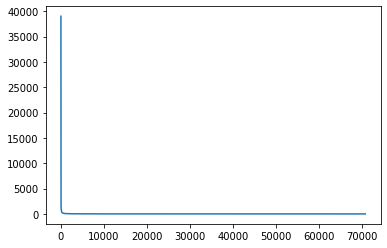

In [0]:
#frequency plot

#Creating a figure and axis lets us do things like change the scaling or add a title
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(word_frequency)), word_frequency['count'])
plt.show()

This plot is not making sense. Why?? Is it because the words are too many on the x axis?




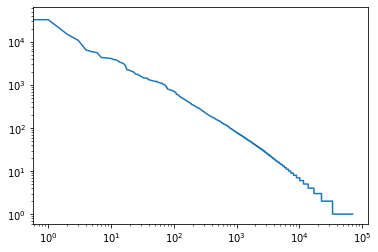

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(word_frequency)), word_frequency['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

(This shows that likelihood of a word occurring is inversely proportional to its rank. This effect is called Zipf's Law, and suggests that the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc. Zipf's law is most easily observed by plotting the data on a log-log graph, with the axes being log (rank order) and log (frequency) resulting in a linear relationship.)

In [0]:
#now I will use nltk to do some analysis
import nltk



## load stop_words_list


In [0]:


HGDstopwords = []
stopwords_path = wd +'hagonda_stop_word.txt'
with open(stopwords_path, 'r', encoding='utf-8') as f:
  for line in f:
    if len(line)>0:
      HGDstopwords.append(line.strip())




## normalize and ch_tokenize function


In [0]:
# normalize tokens 
# if it's not a stop word or punctuation mark, add to the list
# extra_stop = ["#", "吧", "啊","呢"]

def normalizeTokens(word_list, stop_words_freq=None):
    #We can use a generator here as we just need to iterate over it
    normalized = []

    for word in word_list:
        # if it's not a stop word or punctuation mark, add it to our article
        if stop_words_freq and word in stop_words_freq and len(word)>0: 
          continue
        else:
          if (len(word.strip()) > 0):
            normalized.append(word)

    return normalized


In [0]:
def ch_tokenize(s):
  tokenized_words = list(jieba.tokenize(s))
  token_list = [element[0] for element in tokenized_words]
  normalized = [x for x in normalizeTokens(token_list, HGDstopwords) if len(x) > 0 ]
  return normalized

In [0]:
# apply the normalizeTokens function to the new_tweets_df
# note that I have not applied lemmenization; I only filtered out the stop words; Spacy and NLTK currently do not work for the lemmenization of Chinese texts. 
new_tweets_df['normalized_tokens'] = new_tweets_df['tokenize_words'].apply(lambda x: normalizeTokens(x, HGDstopwords))
new_tweets_df.head()


,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label,tokenize_words,normalized_tokens
0,1980768563_Iw9dilFaJ,1583877534,https://weibo.com/1980768563/Iw9dilFaJ,1980768563,2020-02-27 16:37:00,真香警告,102,5,22,NaN,对了记得关注 还有工x号浮云,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[对, 了, 记得, 关注, , , 还有, 工, x, 号, 浮云]","[记得, 关注, 工, x, 号, 浮云]"
1,1980768563_Iy1lKeTGg,1583877534,https://weibo.com/1980768563/Iy1lKeTGg,1980768563,2020-03-10 00:16:00,iPhone XS Max,304,5,49,NaN,明天的更新已经差不多5000字了还要等明天更新数据以及补充更多信息2月24号第一条连140字...,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[明天, 的, 更新, 已经, 差不多, 5000, 字, 了, 还要, 等, 明天, 更新...","[明天, 更新, 已经, 差不多, 5000, 字, 还要, 明天, 更新, 数据, 补充,..."
2,1980768563_Iy1iKDvHR,1583877534,https://weibo.com/1980768563/Iy1iKDvHR,1980768563,2020-03-10 00:09:00,iPhone XS Max,266,609,15,https://m.weibo.cn/s/video/show?object_id=1034...,谢谢谢谢你们的奉献 这个视频真的很感人-ZH,NaN,https://weibo.cn/comment/Iy0c8sbD4?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[谢谢, 谢谢你们, 的, 奉献, , 这个, 视频, 真的, 很, 感人, -, ZH]","[谢谢, 谢谢你们, 奉献, 真的, 感人, ZH]"
3,1980768563_Iy19ymfjm,1583877534,https://weibo.com/1980768563/Iy19ymfjm,1980768563,2020-03-10 23:46:00,iPhone XS Max,607,30,83,NaN,欧洲尾盘反弹了原来是你艹这都能跳水从+3%跌到-2%了这口毒奶欧洲三大股没一个守住的股市冥灯...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[欧洲, 尾盘, 反弹, 了, 原来, 是, 你, 艹, 这, 都, 能, 跳水, 从, +...","[欧洲, 尾盘, 反弹, 原来, 艹, 跳水, 3%, 跌到, 2%, 这口, 毒奶, 欧洲..."
4,1980768563_Iy13sbx39,1583877534,https://weibo.com/1980768563/Iy13sbx39,1980768563,2020-03-10 23:31:00,iPhone XS Max,499,77,87,NaN,艹这都能跳水从+3%跌到-2%了这口毒奶欧洲三大股没一个守住的股市冥灯实锤了 美股高开低走感...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[艹, 这, 都, 能, 跳水, 从, +, 3%, 跌到, -, 2%, 了, 这口, 毒...","[艹, 跳水, 3%, 跌到, 2%, 这口, 毒奶, 欧洲, 三大股, 没, 守住, 股市..."


In [0]:
print(len('咖啡厅'))
print(len('里'))

3
1


In [0]:
#.sum() adds together the lists from each row into a single list
tweetsdist = nltk.ConditionalFreqDist(((len(w), w) for w in new_tweets_df['normalized_tokens'].sum()))

#print the number of words
print(tweetsdist.N())

490196


In [0]:
list(tweetsdist[5])[:10]

['.....',
 '50000',
 '印度尼西亚',
 '病毒感染者',
 'Bonds',
 '0.265',
 '欠发达国家',
 '12500',
 '47.8%',
 '52.2%']

In [0]:
tweetsCProb = nltk.ConditionalProbDist(tweetsdist,nltk.ELEProbDist)

# print the most common 3 character word and its probability
print("The most common 3 character word is: ")
print(tweetsCProb[3].max())
print("And its probabilty is: ")
print(tweetsCProb[3].prob(tweetsCProb[3].max()))



The most common 3 character word is: 
cry
And its probabilty is: 
0.009577253195179339


In [0]:
# print the most common 4 character word
print("The most common 4 character word is: ")
print(tweetsCProb[4].max())
print("And its probabilty is: ")
print(tweetsCProb[4].prob(tweetsCProb[4].max()))

print("------------------------")
# print the most common 2 character word
print("The most common 2 character word is: ")
print(tweetsCProb[2].max())
print("And its probabilty is: ")
print(tweetsCProb[2].prob(tweetsCProb[2].max()))

The most common 4 character word is: 
good
And its probabilty is: 
0.007648066568771415
------------------------
The most common 2 character word is: 
中国
And its probabilty is: 
0.011051224103727775


## word cloud 


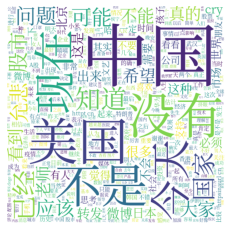

In [0]:
#draw word cloud 
import wordcloud #Makes word clouds
wc = wordcloud.WordCloud(font_path= wd +'Noto_Serif_SC/NotoSerifSC-Regular.otf', background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(new_tweets_df['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig(wd + "Weibo_tweets_word_cloud.pdf", format = 'pdf')

From the Word Cloud, we ssee that China is the most frequent word. US also occurs fairly frequently. Other words that of interest to my project are "国家" （nation）.

In [0]:
# bigrams, trigrams, quadgrams, higher-order ngrams and skipgrams

identify statistically significant bigrams, trigrams, quadgrams, higher-order ngrams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

In [0]:
# look at bigrams
tweetsBigrams = nltk.collocations.BigramCollocationFinder.from_words(new_tweets_df['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(tweetsBigrams.N))

There are 490196 bigrams in the finder


In [0]:
def bigramScoring(count, wordsTuple, total):
    return count

print(tweetsBigrams.nbest(bigramScoring, 10))

[(' ', ' '), (' ', '9'), ('9', '张'), ('转发', '微博'), (' ', '3'), (' ', '文艺'), ('笑', 'cry'), ('文艺', ' '), ('3', '张'), (' ', '侯宁')]


In [0]:
# association in bigrams using likelihood ratio

bigram_measures = nltk.collocations.BigramAssocMeasures()
tweetsBigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]
# other options include student_t, chi_sq, likelihood_ratio, pmi

[((' ', ' '), 22423.68882137467),
 (('笑', 'cry'), 6064.026513528728),
 (('转发', '微博'), 5312.800787914119),
 (('9', '张'), 5199.483580804831),
 (('httpt', 'cn'), 4090.099493506366),
 (('httpsinaurl', 'cn'), 3762.9239334895174),
 (('3', '张'), 3616.8238927401094),
 (('🐲', '🐲'), 2976.304480334781),
 (('秒', '拍'), 2630.537457595168),
 (('评论', '配图'), 2302.7888158813325),
 (('查看', '图片'), 2202.356705883208),
 (('喵', '喵'), 2153.1062824919077),
 ((' ', '文艺'), 2105.111467102444),
 (('挖', '鼻'), 1997.2945253875687),
 (('文艺', ' '), 1884.8240703084082),
 ((' ', '9'), 1725.8541077202167),
 (('37', '地产'), 1621.4927455620332),
 (('侯', '老师'), 1616.2448197455622),
 (('---', '37'), 1544.931395131394),
 (('小米', '10'), 1531.1055528469362),
 (('不', '知道'), 1511.0744369123013),
 (('侯宁', '微博'), 1474.211432412511),
 (('6', '张'), 1383.5313246235446),
 (('\u3000', '\u3000'), 1343.6563643956722),
 (('头条', '文章'), 1243.934120044859),
 ((' ', '3'), 1208.8650976554613),
 (('侯宁', '说'), 1183.4931376664442),
 ((' ', 'httpsina

From above we can see that there are still many words that needs to be taken out such as punctuations, httpt, httpsinaurl, \u3000, [, →, ---, and also emoji's. 


In [0]:
## Part of Speech, Name Entity Recognition, Dependency parsing and graph representation

# Cluster Analysis

## tf-idf

In [0]:
# sklearn中的CountVectorizer可以实现将文本转换为稀疏矩阵，此处输入的中文文本必须是要先分好词再按空格分隔 合并为一个字符串才可以


In [0]:
#filter by tf-idf
#create count vectorizer
#CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#font_path = NotoSerifSC-Regular.otf

#try countVectorizer to transform the content column
CountVectorizer=sklearn.feature_extraction.text.CountVectorizer(lowercase=False, tokenizer = ch_tokenize) #initialize the countvectorizer



In [0]:
tweetsVects = CountVectorizer.fit_transform(new_tweets_df['content']) #train
tweetsVects
print(tweetsVects.shape)

(22800, 70218)


In [0]:
print(CountVectorizer.vocabulary_.get('疫情'))

49219


In [0]:

print(CountVectorizer.vocabulary_.get('中国'))

7550


In [0]:
tweetsTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(tweetsVects) #initialize
tweetsTF = tweetsTFTransformer.transform(tweetsVects) #train
print(tweetsTF.shape)

(22800, 70218)


In [0]:
list(zip(CountVectorizer.vocabulary_.keys(), tweetsTF.data))[:20] 

[('记得', 0.335995680675533),
 ('关注', 0.4568145802129887),
 ('工', 0.48887460475595684),
 ('x', 0.3189740837585819),
 ('号', 0.29860384582065047),
 ('浮云', 0.4985180436538016),
 ('明天', 0.11143484655869688),
 ('更新', 0.13949720720238803),
 ('已经', 0.1646989794889148),
 ('差不多', 0.2264061528452635),
 ('5000', 0.17633894292377403),
 ('字', 0.14371880804915274),
 ('还要', 0.21476618941040426),
 ('数据', 0.18317729699262844),
 ('补充', 0.1120795585518344),
 ('信息', 0.12387092831928218),
 ('2', 0.1515884045748527),
 ('24', 0.34353269246274154),
 ('第一条', 0.25728260361515976),
 ('140', 0.13851346151984043)]

In [0]:
TweetsTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False, tokenizer = ch_tokenize, max_df=0.5, max_features=1000, min_df=3, norm='l2')
#train
TweetsTFVects = TweetsTFVectorizer.fit_transform(new_tweets_df['content'])

In [0]:
print(TweetsTFVects.shape)

(22800, 1000)


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('中国'))

118


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('疫情'))

738


In [0]:
print(TweetsTFVectorizer.vocabulary_.get('美国'))

810


In [0]:
try:
    print(TweetsTFVectorizer.vocabulary_['中国'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(TweetsTFVectorizer.vocabulary_.keys())[:10]))

118


## flat clustering with k-means

In [0]:
 new_tweets_df['label'].unique()

array(['影评,移动互联网,商业', '得瑟,天秤座', nan, '天使投资,小米手机,我们都爱用米聊', '好书,历史,看电影',
       '读书,幽默,自由', '槐花蛇,财富苍生,股市趋势', '新闻,网络,文字', '人民日报'], dtype=object)

I will create a new dataframe using 4 labels from new_tweets_df to do flat clustering with k-means
The four labels I chose for this analysis are: "槐花蛇,财富苍生,股市趋势", "人民日报", "读书,幽默,自由", "'好书,历史,看电影".
The first label is associated the weibo account of a user who comments on the stock market, the second one is the official account of the newspaper agency "people's daily", the 3rd and 4th labels are associated with users who self-identified as authors and scholars. Their corresponding user_Id's are 1483330984, 2803301701, 1263406744, 1280463227

In [0]:
KmCategories = ['槐花蛇,财富苍生,股市趋势', '人民日报', '读书,幽默,自由', '好书,历史,看电影']

In [0]:

Name_filter = new_tweets_df['user_id'].isin([1483330984, 2803301701, 1263406744, 1280463227])
km_tweets_df = new_tweets_df[Name_filter].sort_values(['label'])

In [0]:
km_tweets_df.head()

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label,tokenize_words,normalized_tokens,reduced_tokens
5366,2803301701_IxDx49uXl,1584207178,https://weibo.com/2803301701/IxDx49uXl,2803301701,2020-03-08 11:38:00,微博 weibo.com,6477,918,981,NaN,这三天的3组数很重要 [组图共3张,http://wx4.sinaimg.cn/wap180/a716fd45ly1gcmd9i...,NaN,NaN,2020,人民日报,男,北京,人民日报,"[这, 三天, 的, 3, 组数, 很, 重要, , [, 组图, 共, 3, 张]","[三天, 3, 组数, 重要, 3, 张]","[3, 重要, 3, 张]"
5365,2803301701_Ixu83vlQO,1584207177,https://weibo.com/2803301701/Ixu83vlQO,2803301701,2020-03-07 11:42:00,微博 weibo.com,17458,1881,2432,NaN,两位数,http://wx1.sinaimg.cn/wap180/a716fd45ly1gcl7rj...,NaN,NaN,2020,人民日报,男,北京,人民日报,[两位数],[两位数],[]
550,1280463227_Iy4Kw6cOy,1583891273,https://weibo.com/1280463227/Iy4Kw6cOy,1280463227,2020-03-10 19:55:00,即刻笔记,18,13,3,NaN,一个人独处并不是只丢下一切躲起来而是要回到最纯粹的自己 罗志渊 我们读书吧 文艺 一起读...,http://wx1.sinaimg.cn/wap180/b0f11a02gy1gchqhy...,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[一个, 人, 独处, 并, 不是, 只, 丢下, 一切, 躲起来, 而是, 要, 回到, ...","[人, 独处, 不是, 只, 丢下, 躲起来, 回到, 最, 纯粹, 罗志渊, 读书, 文艺...","[人, 不是, 只, 最, 读书, 文艺, 一起, 读书, 9, 张]"
3542,1280463227_Iu64wjanL,1584206028,https://weibo.com/1280463227/Iu64wjanL,1280463227,2020-02-14 04:56:00,即刻笔记,67,35,11,NaN,我们生而破碎用活着来修修补补 尤金·奥尼尔 文艺 [组图共9张,http://wx4.sinaimg.cn/wap180/a7295e45ly1fqralv...,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[我们, 生而, 破碎, 用, 活着, 来, 修修补补, , , , 尤金, ·, 奥...","[生而, 破碎, 活着, 修修补补, 尤金, 奥尼尔, 文艺, 9, 张]","[文艺, 9, 张]"
3540,1280463227_ItT654F6X,1584206027,https://weibo.com/1280463227/ItT654F6X,1280463227,2020-02-12 19:55:00,微博 weibo.com,886,8,2,NaN,小调查关于疫情你目前最关注的事情是 疫情形势出现3个积极变化 最新疫情地图 文艺 关于疫情...,NaN,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[小, 调查, 关于, 疫情, 你, 目前, 最, 关注, 的, 事情, 是, , , ...","[小, 调查, 疫情, 目前, 最, 关注, 事情, 疫情, 形势, 出现, 3, 积极, ...","[小, 调查, 疫情, 目前, 最, 关注, 事情, 疫情, 出现, 3, 最新, 疫情, ..."


In [0]:
len(km_tweets_df)

20612

In [0]:
#train
kmTweetsTFVects = TweetsTFVectorizer.fit_transform(km_tweets_df['content'])

In [0]:
print(set(km_tweets_df['label']))

{'槐花蛇,财富苍生,股市趋势', '好书,历史,看电影', '读书,幽默,自由', '人民日报'}


In [0]:
# number of clusters
KMnumClusters = len(set(km_tweets_df['label']))
print(KMnumClusters)

4


In [0]:
#cluster using k means
tweetsKM = sklearn.cluster.KMeans(n_clusters = KMnumClusters, init='k-means++')
tweetsKM.fit(kmTweetsTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print("For tweets km clusters:")
print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(km_tweets_df['label'], tweetsKM.labels_)))
print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(km_tweets_df['label'], tweetsKM.labels_)))
print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(km_tweets_df['label'], tweetsKM.labels_)))
print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(km_tweets_df['label'], tweetsKM.labels_)))

For tweets km clusters:
Homogeneity: 0.144
Completeness: 0.103
V-measure: 0.120
Adjusted Rand Score: 0.151


In [0]:
km_tweets_df['kmeans_predictions'] = tweetsKM.labels_
km_tweets_df.sample()

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label,tokenize_words,normalized_tokens,kmeans_predictions
7750,1483330984_Iay7twlDj,1584209700,https://weibo.com/1483330984/Iay7twlDj,1483330984,2019-10-08 15:35:02,微博 weibo.com,103,58,15,NaN,用朝鲜战争美国飞行员换回来·该喝喝对还有钱七虎将军·该喝喝钱七虎钱学森钱伟长钱三强著名的三钱...,http://wx1.sinaimg.cn/wap180/6328b6bbly1g7qgmv...,https://weibo.cn/comment/Iavxa1eWs?rl=1#cmtfrm,NaN,2019,侯宁,男,北京,"槐花蛇,财富苍生,股市趋势","[用, 朝鲜战争, 美国, 飞行员, 换回来, ·, 该, 喝喝, 对, 还有, 钱七虎, ...","[朝鲜战争, 美国, 飞行员, 换回来, 喝喝, 钱七虎, 将军, 喝喝, 钱七虎, 钱学森...",0


In [0]:
terms = TweetsTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = tweetsKM.cluster_centers_.argsort()[:, ::-1]
for i in range(KMnumClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 中国
 不
 人
 说
 好
 还
 允悲
 看
 没
 大


Cluster 1:
 张
 9
 3
 文艺
 6
 读书
 人
 晚安
 不
 喜鹊


Cluster 2:
 笑
 cry
 不语
 坏
 不
 看
 说
 还
 没
 好


Cluster 3:
 微博
 转发
 侯宁
 不
 中国
 人
 还
 武汉
 好
 晚安




In [0]:
#PCA dimension reduction

KMPCA = sklearn.decomposition.PCA(n_components = 2).fit(kmTweetsTFVects.toarray()) # n_components = 2 -- makes the graph two dimensional 
KMreducedPCA_data = KMPCA.transform(kmTweetsTFVects.toarray())

# colors = list(plt.cm.rainbow(np.linspace(0,1, KMnumClusters)))
# colors_p = [colors[l] for l in tweetsKM.labels_]

In [0]:
colordict = {
'槐花蛇,财富苍生,股市趋势': 'red',
'人民日报': 'yellow',
'读书,幽默,自由': 'green',
'好书,历史,看电影': 'blue',
    }
colors = [colordict[c] for c in km_tweets_df['label']] #['red','red',....'orange']
print("The categories' colors are:\n{}".format(colordict.items()))

The categories' colors are:
dict_items([('槐花蛇,财富苍生,股市趋势', 'red'), ('人民日报', 'yellow'), ('读书,幽默,自由', 'green'), ('好书,历史,看电影', 'blue')])


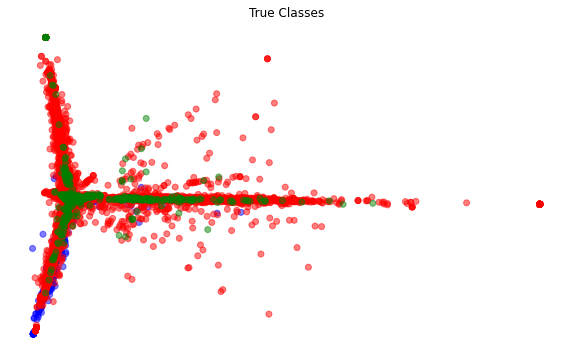

In [0]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors, alpha = 0.5, label = colors)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

In [0]:
components = KMPCA.components_
keyword_ids = list(set(order_centroids[:,:10].flatten())) #Get the ids of the most distinguishing words(features) from your kmeans model.
words = [terms[i] for i in keyword_ids]#Turn the ids into words.
x = components[:,keyword_ids][0,:] #Find the coordinates of those words in your biplot.
y = components[:,keyword_ids][1,:]

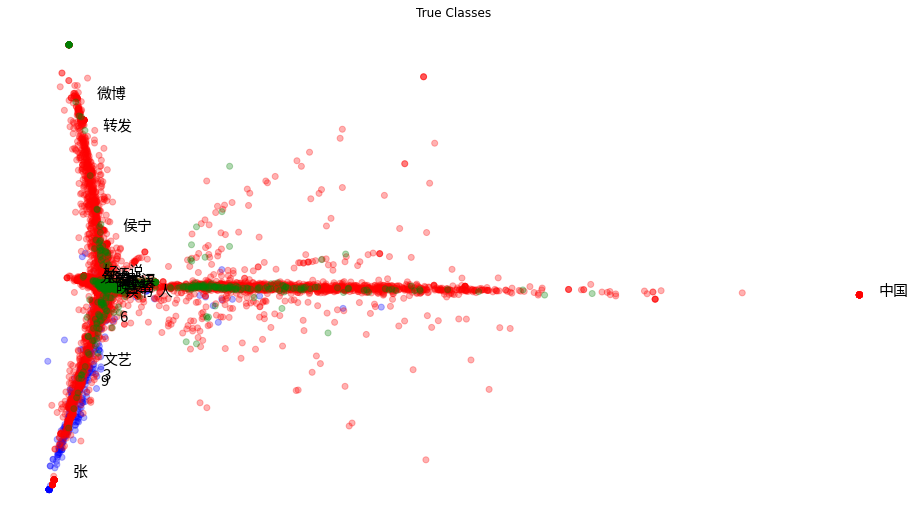

In [0]:
fig = plt.figure(figsize = (16,9))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
ax.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors, alpha = 0.3, label = colors)
for i, word in enumerate(words):
    ax.annotate(word, (x[i],y[i]), fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.title('True Classes')
plt.show()

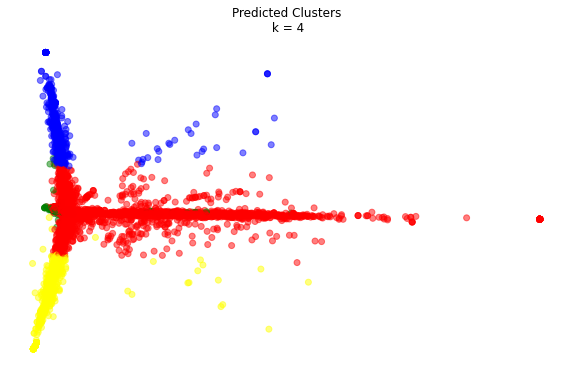

In [0]:
# for predicted clusters

colors_p = [colordict[KmCategories[l]] for l in tweetsKM.labels_]

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = 4')
plt.show()

## Silhouette

In [0]:
# selecting cluster number
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(KMreducedPCA_data[:, 0], KMreducedPCA_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = KMPCA.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


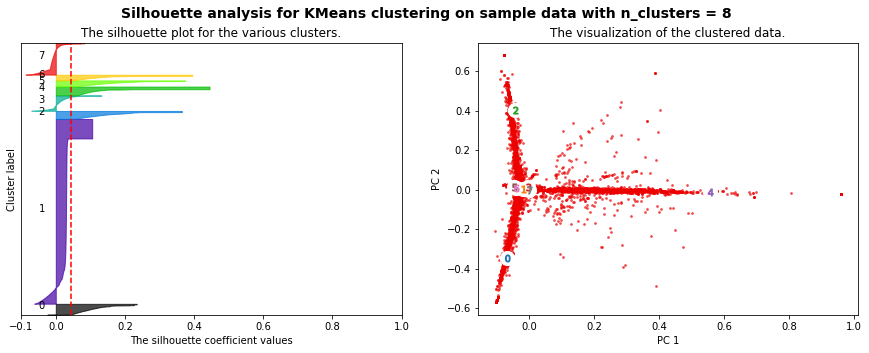

For n_clusters = 8, The average silhouette_score is : 0.044


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(8, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


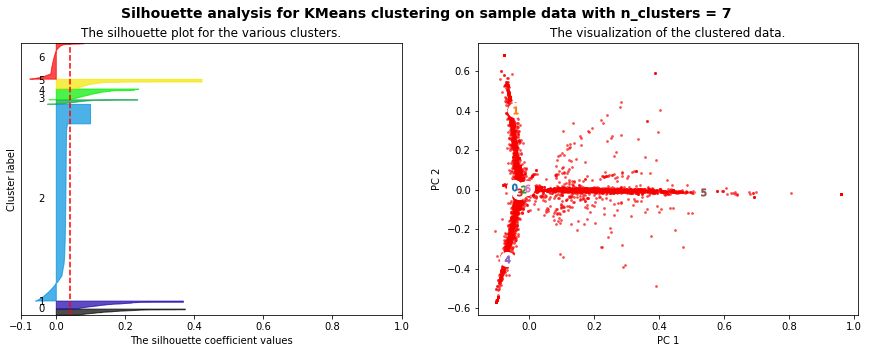

For n_clusters = 7, The average silhouette_score is : 0.041


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(7, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


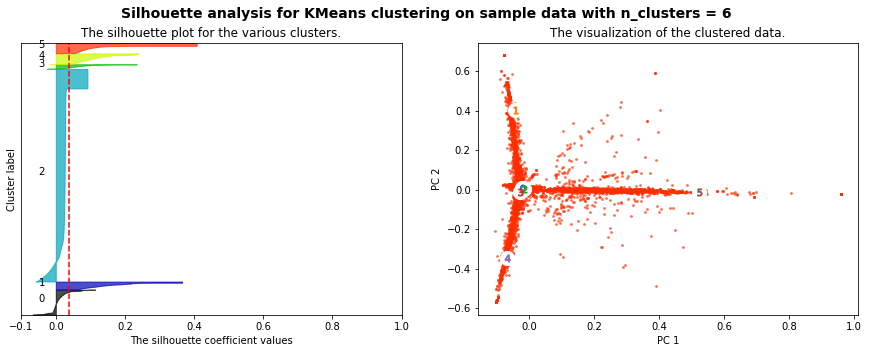

For n_clusters = 6, The average silhouette_score is : 0.038


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(6, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


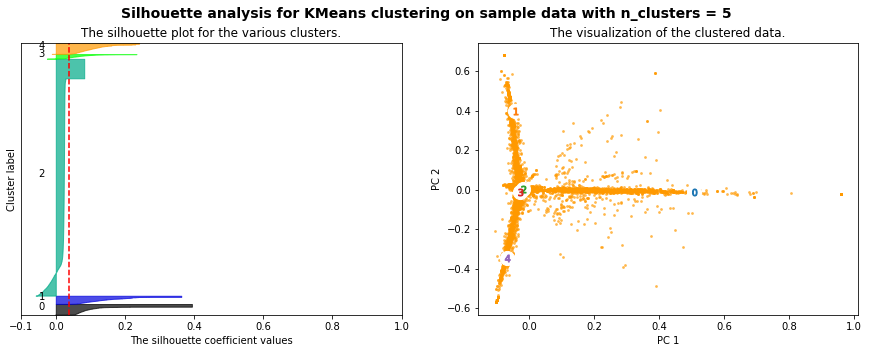

For n_clusters = 5, The average silhouette_score is : 0.037


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(5, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


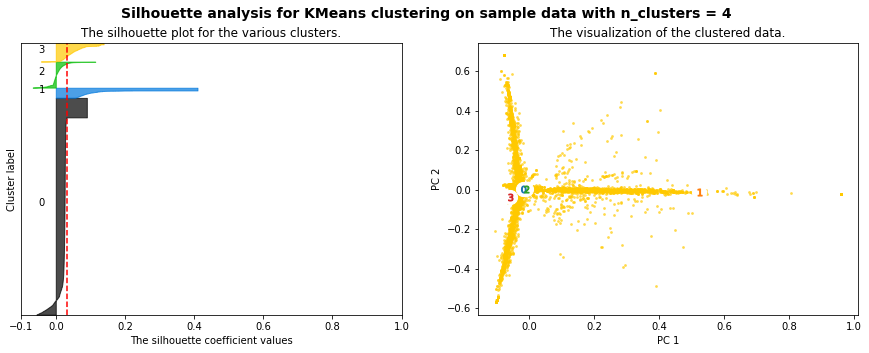

For n_clusters = 4, The average silhouette_score is : 0.032


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(4, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


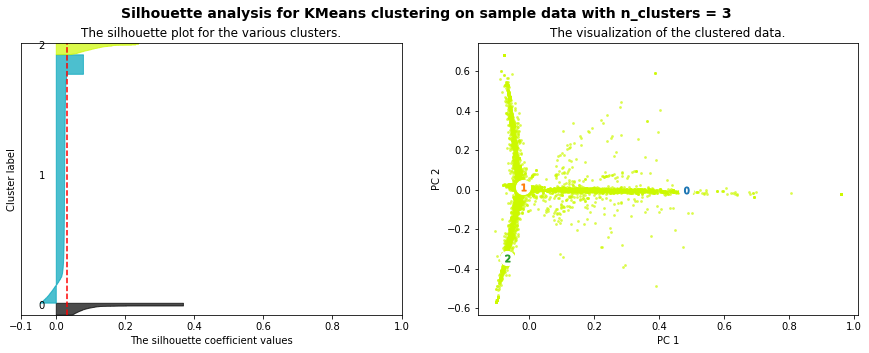

For n_clusters = 3, The average silhouette_score is : 0.034


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(3, X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


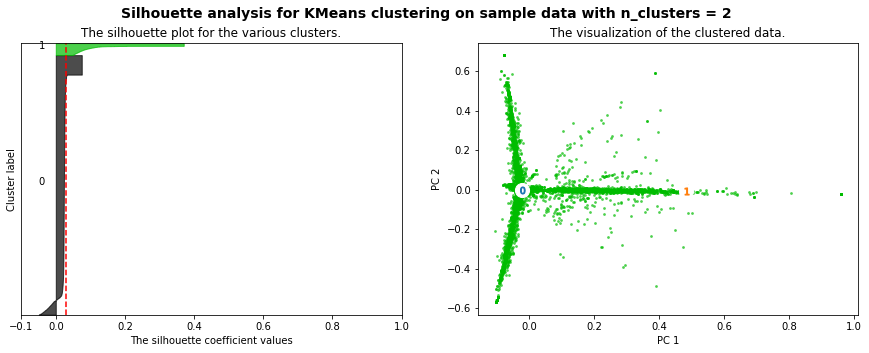

For n_clusters = 2, The average silhouette_score is : 0.030


In [0]:
X = kmTweetsTFVects.toarray()
plotSilhouette(2, X)

Interestingly, the sihouette analysis above shows that within 4 clusters, 3 clusters has the highest average sillouette score. This seems to makes sense because two of the labels are both authors/scholars. Moreover, when clusters are more than 4, the larger the number of the clusters, the higher the score. 

However, these results are doubtful given the fact that the top terms distuished by k-means are largely jibberish words instead of words that are truly discriminating.

## Hierarchical Clustering

In [0]:
kmTweetsTFVects

<20612x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 132001 stored elements in Compressed Sparse Row format>

In [0]:
kmTweetsTFVects[:100].todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
kmTweetsCoocMat = kmTweetsTFVects * kmTweetsTFVects.T


In [0]:
kmTweetsCoocMat.setdiag(0) 

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [0]:
km_tweets_df.head()

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label,tokenize_words,normalized_tokens,kmeans_predictions
5366,2803301701_IxDx49uXl,1584207178,https://weibo.com/2803301701/IxDx49uXl,2803301701,2020-03-08 11:38:00,微博 weibo.com,6477,918,981,NaN,这三天的3组数很重要 [组图共3张,http://wx4.sinaimg.cn/wap180/a716fd45ly1gcmd9i...,NaN,NaN,2020,人民日报,男,北京,人民日报,"[这, 三天, 的, 3, 组数, 很, 重要, , [, 组图, 共, 3, 张]","[三天, 3, 组数, 重要, 3, 张]",1
5365,2803301701_Ixu83vlQO,1584207177,https://weibo.com/2803301701/Ixu83vlQO,2803301701,2020-03-07 11:42:00,微博 weibo.com,17458,1881,2432,NaN,两位数,http://wx1.sinaimg.cn/wap180/a716fd45ly1gcl7rj...,NaN,NaN,2020,人民日报,男,北京,人民日报,[两位数],[两位数],0
550,1280463227_Iy4Kw6cOy,1583891273,https://weibo.com/1280463227/Iy4Kw6cOy,1280463227,2020-03-10 19:55:00,即刻笔记,18,13,3,NaN,一个人独处并不是只丢下一切躲起来而是要回到最纯粹的自己 罗志渊 我们读书吧 文艺 一起读...,http://wx1.sinaimg.cn/wap180/b0f11a02gy1gchqhy...,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[一个, 人, 独处, 并, 不是, 只, 丢下, 一切, 躲起来, 而是, 要, 回到, ...","[人, 独处, 不是, 只, 丢下, 躲起来, 回到, 最, 纯粹, 罗志渊, 读书, 文艺...",1
3542,1280463227_Iu64wjanL,1584206028,https://weibo.com/1280463227/Iu64wjanL,1280463227,2020-02-14 04:56:00,即刻笔记,67,35,11,NaN,我们生而破碎用活着来修修补补 尤金·奥尼尔 文艺 [组图共9张,http://wx4.sinaimg.cn/wap180/a7295e45ly1fqralv...,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[我们, 生而, 破碎, 用, 活着, 来, 修修补补, , , , 尤金, ·, 奥...","[生而, 破碎, 活着, 修修补补, 尤金, 奥尼尔, 文艺, 9, 张]",1
3540,1280463227_ItT654F6X,1584206027,https://weibo.com/1280463227/ItT654F6X,1280463227,2020-02-12 19:55:00,微博 weibo.com,886,8,2,NaN,小调查关于疫情你目前最关注的事情是 疫情形势出现3个积极变化 最新疫情地图 文艺 关于疫情...,NaN,NaN,NaN,2020,罗志渊,男,香港,"好书,历史,看电影","[小, 调查, 关于, 疫情, 你, 目前, 最, 关注, 的, 事情, 是, , , ...","[小, 调查, 疫情, 目前, 最, 关注, 事情, 疫情, 形势, 出现, 3, 积极, ...",0


In [0]:
set(km_tweets_df['label'])

{'人民日报', '好书,历史,看电影', '槐花蛇,财富苍生,股市趋势', '读书,幽默,自由'}

In [0]:
# compute a tree of nested clusters & look at first 50 texts of each class
selectIndices = []
indexToCat = []
for c in set(km_tweets_df['label']):
    selectIndices += list(km_tweets_df[km_tweets_df['label'] == c].index)[:50] #if newsgroupsDF['category'] == c
    indexToCat += [c] * 50
    #.groupby('category').sum()



In [0]:
subCoocMat = kmTweetsCoocMat[selectIndices,:][:,selectIndices]

In [0]:
linkage_matrix = scipy.cluster.hierarchy.ward(subCoocMat.toarray())
linkage_matrix[:10]

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([[  8.,  39.,   0.,   2.],
       [ 43., 152.,   0.,   3.],
       [ 44., 153.,   0.,   4.],
       [ 46., 154.,   0.,   5.],
       [ 49., 155.,   0.,   6.],
       [ 50., 156.,   0.,   7.],
       [ 53., 157.,   0.,   8.],
       [ 57., 158.,   0.,   9.],
       [ 67., 159.,   0.,  10.],
       [ 69., 160.,   0.,  11.]])

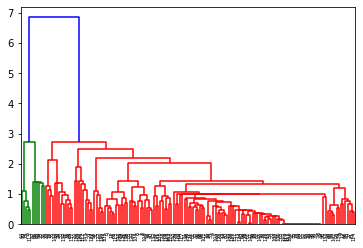

In [0]:
#visualize the tree
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True)


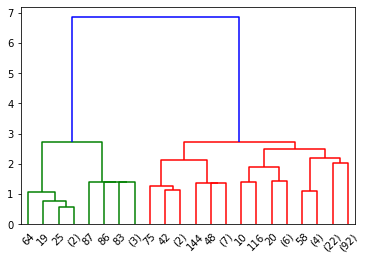

In [0]:
# visualize the tree after truncating
dendrogramDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=4, truncate_mode='level', get_leaves=True)

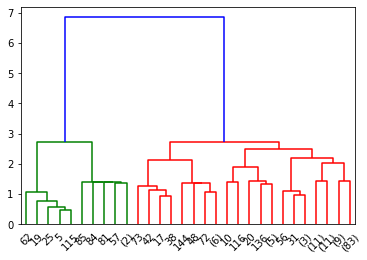

In [0]:
# visualize the tree 
dendrogramDat2 = scipy.cluster.hierarchy.dendrogram(linkage_matrix, p=5, truncate_mode='level', get_leaves=True)

In [0]:
## fcluster
# hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 4, 'maxclust')
# hierarchicalClusters

In [0]:
# linkage_matrix_full = scipy.cluster.hierarchy.ward(kmTweetsCoocMat.toarray())
# hierarchicalClusters_full = scipy.cluster.hierarchy.fcluster(linkage_matrix_full, 4, 'maxclust')
# print("For our complete clusters:")
# print("Homogeneity: {:0.3f}".format(sklearn.metrics.homogeneity_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("Completeness: {:0.3f}".format(sklearn.metrics.completeness_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("V-measure: {:0.3f}".format(sklearn.metrics.v_measure_score(km_tweets_df['label'], hierarchicalClusters_full)))
# print("Adjusted Rand Score: {:0.3f}".format(sklearn.metrics.adjusted_rand_score(km_tweets_df['label'], hierarchicalClusters_full)))

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


In [0]:
# # wald_predictions vs. k-means
# km_tweets_df['label'] = hierarchicalClusters_full
# km_tweets_df.head()

## Topic Modeling

In [0]:
# create corpus and create a column with only tokens from TweetsTFVectorizer's vocabulary

def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab] # for word in wordlst, if word in vocab, return w

new_tweets_df['reduced_tokens'] = new_tweets_df['normalized_tokens'].apply(lambda x: dropMissing(x, TweetsTFVectorizer.vocabulary_.keys()))

In [0]:
def join_tweets(tokenized_word_lists):
  joined_token_list = []
  for token_list in tokenized_word_lists:
    for token in token_list:
      joined_token_list.append(token)
  return joined_token_list

In [0]:
topicm_df = new_tweets_df.groupby(['year']).agg(all_reduced_tokens=('reduced_tokens',join_tweets))



In [0]:
topicm_df.head()

,all_reduced_tokens
year,
2009,"[成功, httpsinaurl, cn, 中国, 人, httpsinaurl, cn, ..."
2010,"[大, httpsinaurl, cn, 楼市, 大, httpsinaurl, cn, 股..."
2011,"[支持, 今天, 应该, 心, 不, 人, 呵呵, 钱, 好, 准备, 好, 早, 心, 背..."
2012,"[这位, 够, 卖, 知道, 股票, 其实, 做, 选择, 美, 不是, 偷笑, 股市, 看..."
2013,"[央视, 说, 说, 看, 说, 转发, 微博, 转发, 微博, 一起, 老, 带, 一下,..."


In [0]:
topicm_df.index

Int64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='year')

In [0]:
dictionary = gensim.corpora.Dictionary(topicm_df['all_reduced_tokens'])

In [0]:
corpus = [dictionary.doc2bow(text) for text in topicm_df['all_reduced_tokens']]

In [0]:
# serialize the corpus and load it (for large corpus)
gensim.corpora.MmCorpus.serialize((wd + 'sina_export_3_18/tweets_copy.json'), corpus)
tweetscorpus = gensim.corpora.MmCorpus((wd + 'sina_export_3_18/tweets_copy.json'))


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
#lda model
tweetslda = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto') # initialize the ldamodel

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
print(tweetslda)

LdaModel(num_terms=1000, num_topics=10, decay=0.5, chunksize=2000)


In [0]:
# create a dataframe for lda topics
ldaDF = pd.DataFrame({
        'year' : topicm_df.index,
        'topics' : [tweetslda[dictionary.doc2bow(l)] for l in topicm_df['all_reduced_tokens']] #value of 'topics' - for each token in "reduced_tokens" column, apply the the doc2bow function to each token, and then apply the senlda model 
    }) # make the dictionary a dataframe;

In [0]:
ldaDF.head()

,year,topics
0,2009,"[(4, 0.39895052), (6, 0.26110318), (7, 0.33845..."
1,2010,"[(0, 0.06166526), (1, 0.049809586), (2, 0.0398..."
2,2011,"[(0, 0.12330843), (1, 0.07135678), (2, 0.10432..."
3,2012,"[(0, 0.101281814), (1, 0.23295961), (2, 0.0782..."
4,2013,"[(0, 0.20137192), (1, 0.1357229), (2, 0.188412..."


In [0]:
#make each topic its own column
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(tweetslda.num_topics)} # *len(ldaDF) so that each topic column has the length of 999.
                      # [0] * len(ldaDF) to make sure topicsProbDict[topicNum][index] can refer to the index in the list [0] * len(ldaDF)
#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob   #replace each [0] with a corresponding prob

#Update the DataFrame
for topicNum in range(tweetslda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum] #append the ldaDF with the topic_{} columns

ldaDF[:10] #[start_ind : end_index : step_size] # [1:900:10]

,year,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,2009,"[(4, 0.39895052), (6, 0.26110318), (7, 0.33845...",0.000000,0.000000,0.000000,0.000000,0.398951,0.000000,0.261103,0.338460,0.000000,0.000000
1,2010,"[(0, 0.06166526), (1, 0.049809586), (2, 0.0398...",0.061665,0.049810,0.039817,0.066494,0.333822,0.042520,0.148268,0.198318,0.047982,0.011306
2,2011,"[(0, 0.12330843), (1, 0.07135678), (2, 0.10432...",0.123308,0.071357,0.104322,0.047042,0.064897,0.215190,0.105782,0.096184,0.145515,0.026403
3,2012,"[(0, 0.101281814), (1, 0.23295961), (2, 0.0782...",0.101282,0.232960,0.078244,0.061824,0.045277,0.057318,0.137546,0.095082,0.144236,0.046231
4,2013,"[(0, 0.20137192), (1, 0.1357229), (2, 0.188412...",0.201372,0.135723,0.188413,0.026298,0.060695,0.076731,0.099529,0.059319,0.113549,0.038371
5,2014,"[(0, 0.17884572), (1, 0.13211265), (2, 0.28736...",0.178846,0.132113,0.287364,0.035203,0.033242,0.065192,0.071027,0.034341,0.134782,0.027890
6,2015,"[(0, 0.09968609), (1, 0.14370205), (2, 0.09782...",0.099686,0.143702,0.097825,0.062272,0.067867,0.146709,0.054286,0.085416,0.166111,0.076127
7,2016,"[(0, 0.12370361), (1, 0.13559547), (2, 0.08615...",0.123704,0.135595,0.086158,0.103126,0.056628,0.160516,0.041342,0.101224,0.109327,0.082382
8,2017,"[(0, 0.16202953), (1, 0.14791793), (2, 0.09076...",0.162030,0.147918,0.090767,0.101413,0.052821,0.186094,0.026795,0.088980,0.079731,0.063451
9,2018,"[(0, 0.16115995), (1, 0.07946166), (2, 0.14910...",0.161160,0.079462,0.149102,0.140104,0.054934,0.190737,0.043198,0.058939,0.059618,0.062746


In [0]:
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]] # ['topic_%d' %x for x in range(10)] is more efficient way to get all the columns that starts with topics_
ldaDFVisN = ldaDF[:10][['year']]
ldaDFVis = ldaDFV.as_matrix(columns=None) # convert dataframe series to numpy array
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None) #convert dataframe series to numpy array
ldaDFV

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.000000,0.000000,0.000000,0.398951,0.000000,0.261103,0.338460,0.000000,0.000000
1,0.061665,0.049810,0.039817,0.066494,0.333822,0.042520,0.148268,0.198318,0.047982,0.011306
2,0.123308,0.071357,0.104322,0.047042,0.064897,0.215190,0.105782,0.096184,0.145515,0.026403
3,0.101282,0.232960,0.078244,0.061824,0.045277,0.057318,0.137546,0.095082,0.144236,0.046231
4,0.201372,0.135723,0.188413,0.026298,0.060695,0.076731,0.099529,0.059319,0.113549,0.038371
5,0.178846,0.132113,0.287364,0.035203,0.033242,0.065192,0.071027,0.034341,0.134782,0.027890
6,0.099686,0.143702,0.097825,0.062272,0.067867,0.146709,0.054286,0.085416,0.166111,0.076127
7,0.123704,0.135595,0.086158,0.103126,0.056628,0.160516,0.041342,0.101224,0.109327,0.082382
8,0.162030,0.147918,0.090767,0.101413,0.052821,0.186094,0.026795,0.088980,0.079731,0.063451
9,0.161160,0.079462,0.149102,0.140104,0.054934,0.190737,0.043198,0.058939,0.059618,0.062746


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


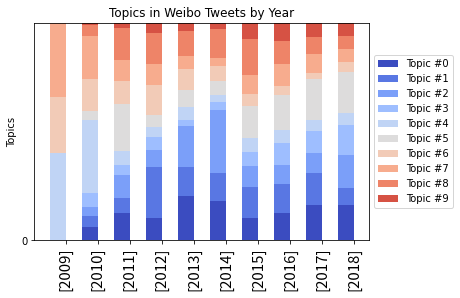

In [0]:
# visualization with bar chart

N = 10
ind = np.arange(N)
K = tweetslda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Weibo Tweets by Year')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical',fontproperties= fontprop )

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


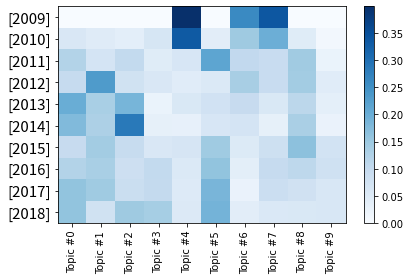

In [0]:
# heat map

#for reference:
#ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]] # ['topic_%d' %x for x in range(10)] is more efficient way to get all the columns that starts with topics_
#ldaDFVisN = ldaDF[:10][['name']]
#ldaDFVis = ldaDFV.as_matrix(columns=None) # convert dataframe series to numpy array (IDaDFVis is the first 10 samples' 10 topic columns)
#ldaDFVisNames = ldaDFVisN.as_matrix(columns=None) #convert dataframe series to numpy array
#ldaDFV

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames, fontproperties= fontprop);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [0]:
tweetslda.show_topic(1)

[('不', 0.022627011),
 ('人', 0.017733447),
 ('中国', 0.014994687),
 ('说', 0.014506761),
 ('还', 0.013018758),
 ('看', 0.009392524),
 ('美国', 0.0086749345),
 ('好', 0.008360811),
 ('张', 0.007702195),
 ('大', 0.0075610206)]

In [0]:
tweetslda.show_topic(4)

[('中国', 0.023810176),
 ('人', 0.01989841),
 ('说', 0.014534478),
 ('不', 0.012795675),
 ('美国', 0.009823667),
 ('还', 0.008553782),
 ('好', 0.008225353),
 ('张', 0.008222639),
 ('看', 0.008132564),
 ('不是', 0.007880633)]

In [0]:
topicsDict = {}
for topicNum in range(tweetslda.num_topics): # topic number = 0
    topicWords = [w for w, p in tweetslda.show_topic(topicNum)] # toppicwords = for word, prob in senlda.show_topic(0), return words
    topicsDict['Topic_{}'.format(topicNum)] = topicWords # topicsDict['Topic_0'] = topicWords
                                                       # As such, the 'for' loop maps each topic_{} to each sets of words in that topic
                                                      # the topicsDict looks like {'topic_0': 'fund', 'worker', ....; 'topic_1':'loan','fund', .... ; }
    

wordRanksDF = pd.DataFrame(topicsDict) # turn dictionary into a pandas dataframe
wordRanksDF

#We can see that several of the topics have the same top words, but there are definitely differences. We can try and make the topics more distinct by changing the $\alpha$ and $\eta$ parameters of the model. $\alpha$ controls the sparsity of document-topic loadings, and $\eta$ controls the sparsity of topic-word loadings.

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,不,不,不,不,中国,中国,不,中国,不,说
1,中国,人,中国,中国,人,不,人,不,中国,人
2,说,中国,人,说,说,人,中国,人,人,不
3,人,说,说,人,不,说,还,说,说,中国
4,还,还,好,还,美国,还,说,还,好,还
5,美国,看,还,好,还,没有,好,好,没有,好
6,看,美国,美国,美国,好,美国,美国,看,没,看
7,张,好,没有,看,张,大,大,不是,张,张
8,好,张,看,股市,看,不是,微博,没有,大,美国
9,不是,大,张,大,不是,好,没有,今天,还,没有


<Figure size 432x288 with 0 Axes>

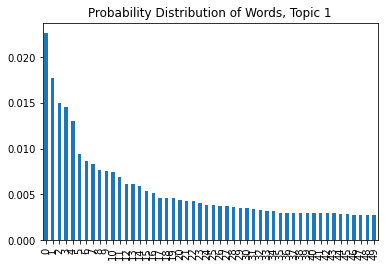

In [0]:
#plot the top 50 words associated with the topic 1
topic1_df = pd.DataFrame(tweetslda.show_topic(1, topn=50)) # 1 is the topic ID
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

In [0]:
tweetslda1 = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, eta = 0.00001)
tweetslda2 = gensim.models.ldamodel.LdaModel(corpus=tweetscorpus, id2word=dictionary, num_topics=10, eta = 0.9)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


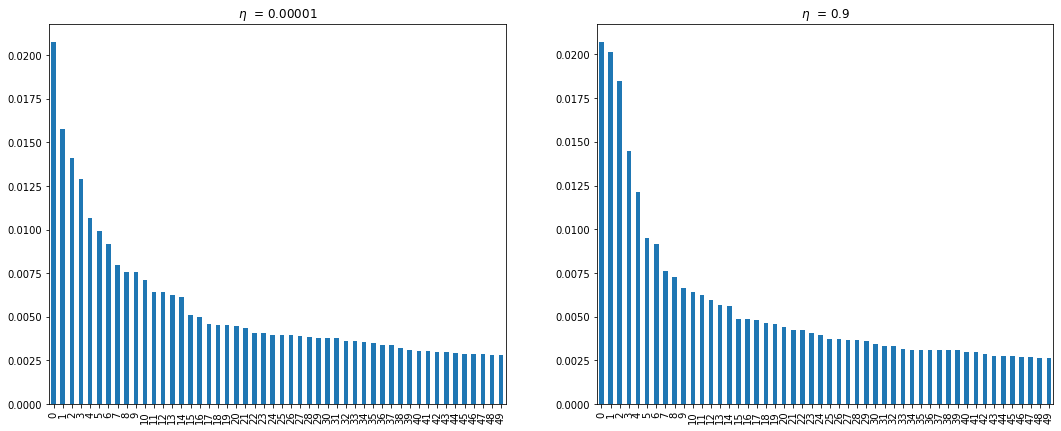

In [0]:
topic11_df = pd.DataFrame(tweetslda1.show_topic(1, topn=50))
topic21_df = pd.DataFrame(tweetslda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

In [0]:
## Dynamic topic models

# Word Embedding


## word2vec model

In [0]:
#train the data with word2vec; new_tweets_df['normalized_tokens']
tweets_W2V_model = gensim.models.word2vec.Word2Vec(new_tweets_df['normalized_tokens'], hs=1, negative = 0)


In [0]:
numwords = 50
tweets_w2v_Words = tweets_W2V_model.wv.index2word[:numwords]

In [0]:
print(tweets_w2v_Words)

['不', '中国', '人', '说', '还', '好', '美国', '看', '没有', '张', '大', '不是', '没', '微博', '现在', '今天', '中', '股市', '做', '3', '已经', '国家', '知道', '最', '问题', '9', '想', '大家', '笑', '可能', '允悲', '2', '吃', '应该', '转发', 'cn', '疫情', '侯宁', '不能', '太', '里', '看到', '下', '点', '老师', '时', '这是', '希望', '1', '市场']


In [0]:
#create submatrix that stores the vectors of 50 words
TweetsSubMatrix = []
for word in tweets_w2v_Words: # GOT_topWords is a list of strings/words
    TweetsSubMatrix.append(tweets_W2V_model[word])
TweetsSubMatrix = np.array(TweetsSubMatrix)
TweetsSubMatrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


array([[-0.42853427, -0.17371404, -0.14634752, ..., -0.16211933,
         0.16397585, -0.1797619 ],
       [-0.11111638, -0.32609403, -0.4164001 , ..., -0.01303266,
         0.17035934,  0.07992767],
       [-0.24686879, -0.04106628, -0.77086234, ...,  0.000797  ,
        -0.10880392,  0.16916022],
       ...,
       [-0.05337781,  0.41314942, -0.00622403, ...,  0.0628482 ,
        -0.17847292, -0.4586086 ],
       [-0.15317543, -0.1077942 ,  0.00656269, ...,  0.29606265,
         0.20845716,  0.17749618],
       [ 0.45027816,  0.7501479 ,  0.21868035, ...,  0.09145518,
         0.07813987, -0.08421226]], dtype=float32)

In [0]:
#PCA dimension reduction to 50 components
tweets_pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(TweetsSubMatrix)
tweets_reducedPCA_data = tweets_pcaWords.transform(TweetsSubMatrix)
#T-SNE
tweets_tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(tweets_reducedPCA_data)

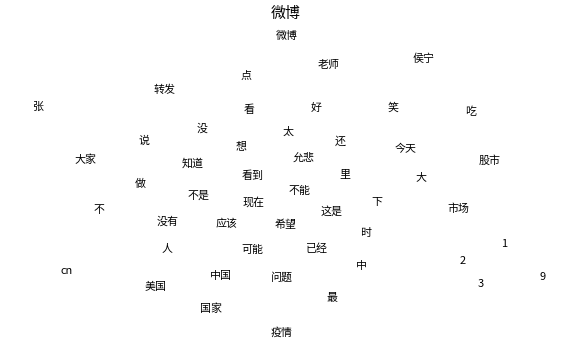

In [0]:
#plot using TSNE

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.title('微博', fontproperties= fontprop)
plt.scatter(tweets_tsneWords[:, 0], tweets_tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(tweets_w2v_Words):
    ax.annotate(word, (tweets_tsneWords[:, 0][i],tweets_tsneWords[:, 1][i]), size =  50 * (numwords - i) / numwords + 10, fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.show()

In [0]:
#plot shows 

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('特朗普') # trump

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('美国', 0.8361590504646301),
 ('总统', 0.8300979137420654),
 ('国务卿', 0.7745875120162964),
 ('媒体', 0.7614294290542603),
 ('外交政策', 0.7592089176177979),
 ('攻击', 0.740001916885376),
 ('受到', 0.7225712537765503),
 ('针对', 0.716701090335846),
 ('强大', 0.7124530673027039),
 ('之间', 0.7108696699142456)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('疫情') # COVID-19

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('病毒', 0.8565771579742432),
 ('全国', 0.8410210609436035),
 ('各地', 0.8343872427940369),
 ('武汉', 0.8187025785446167),
 ('湖北', 0.8081885576248169),
 ('支援', 0.8012591004371643),
 ('抗疫', 0.7979190349578857),
 ('物资', 0.7977777719497681),
 ('医护人员', 0.7898539900779724),
 ('感染', 0.7861630916595459)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('祖国') #motherland/homeland

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('消除', 0.7476192712783813),
 ('那一刻', 0.7438820004463196),
 ('开花', 0.7145371437072754),
 ('瓦', 0.7115633487701416),
 ('正当', 0.701340913772583),
 ('加以', 0.697460412979126),
 ('辛格', 0.6953125596046448),
 ('禽兽', 0.6949694156646729),
 ('植物', 0.6943340301513672),
 ('不怎么', 0.6918796300888062)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('香港') #hong kong

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('失去', 0.7995075583457947),
 ('社会', 0.7349972724914551),
 ('个人', 0.7237578630447388),
 ('民主', 0.7212342023849487),
 ('政府', 0.7206149101257324),
 ('这种', 0.6979120969772339),
 ('法治', 0.6971958875656128),
 ('追求', 0.6954541206359863),
 ('所谓', 0.6923564672470093),
 ('认为', 0.6908091306686401)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('官僚') #

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('娱乐', 0.7814428806304932),
 ('黑比诺', 0.7123031616210938),
 ('柠檬', 0.6863163709640503),
 ('捧', 0.6848892569541931),
 ('交给', 0.6842864751815796),
 ('私利', 0.6731021404266357),
 ('言辞', 0.6682314276695251),
 ('危害', 0.6608018279075623),
 ('瑟', 0.6596230268478394),
 ('话语权', 0.6580140590667725)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('形式主义') #

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('主权', 0.8647339344024658),
 ('好感', 0.8178634643554688),
 ('阵营', 0.8037043809890747),
 ('借此', 0.7843136787414551),
 ('不应', 0.7838783264160156),
 ('人群', 0.783359706401825),
 ('各项', 0.7826738357543945),
 ('双层', 0.7810544967651367),
 ('丈夫', 0.7755343914031982),
 ('积累', 0.7750694751739502)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('人民') # citizen/people

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('政府', 0.8418806195259094),
 ('安全', 0.8177719712257385),
 ('社会', 0.8137081861495972),
 ('国家', 0.8056361079216003),
 ('战争', 0.803462028503418),
 ('资源', 0.8029370307922363),
 ('显然', 0.7952709197998047),
 ('抗疫', 0.7921186685562134),
 ('群众', 0.7802132964134216),
 ('认为', 0.7701234221458435)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('美国') #US

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('俄罗斯', 0.8376046419143677),
 ('特朗普', 0.8361591100692749),
 ('媒体', 0.7943861484527588),
 ('政治', 0.7939070463180542),
 ('社会', 0.7787183523178101),
 ('总统', 0.7786228656768799),
 ('利益', 0.776421844959259),
 ('强大', 0.7713725566864014),
 ('国家', 0.7684828042984009),
 ('受到', 0.7682870626449585)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('日本') #Japan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('韩国', 0.7587536573410034),
 ('一部分', 0.7023356556892395),
 ('驻', 0.6921477317810059),
 ('意大利', 0.6907206773757935),
 ('伊朗', 0.6812098026275635),
 ('当中', 0.6795153617858887),
 ('本土', 0.6639458537101746),
 ('已经', 0.6614159941673279),
 ('帮助', 0.6529904007911682),
 ('物资', 0.6357795000076294)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('习近平') # Chairman Xi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('内奸', 0.7513473629951477),
 ('强调', 0.7511773109436035),
 ('大海', 0.7443689107894897),
 ('克林顿', 0.7389897108078003),
 ('宣传部', 0.7284599542617798),
 ('又名', 0.7113503217697144),
 ('BBC', 0.7103856205940247),
 ('朝代', 0.703579306602478),
 ('这块', 0.7031169533729553),
 ('领取', 0.6965652704238892)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('中国') # China

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('发展', 0.7727576494216919),
 ('经济', 0.7670546174049377),
 ('历史', 0.7171522378921509),
 ('国家', 0.7135168313980103),
 ('建设', 0.7087501287460327),
 ('世界', 0.67052161693573),
 ('社会', 0.6647185683250427),
 ('运转', 0.6575570106506348),
 ('全世界', 0.6555383205413818),
 ('利益', 0.6479046940803528)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('社会主义') #Socialism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('米国', 0.8327260613441467),
 ('指出', 0.7947970628738403),
 ('中国政府', 0.7757930755615234),
 ('消除', 0.7721095085144043),
 ('主体', 0.7702503204345703),
 ('某种', 0.7539917230606079),
 ('策略', 0.7509713768959045),
 ('阐释', 0.7488119006156921),
 ('重新', 0.7316106557846069),
 ('建设', 0.7292150259017944)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('资本主义') #Capitalism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('混迹', 0.7914754152297974),
 ('美国政府', 0.7713810205459595),
 ('对华', 0.758344292640686),
 ('整治', 0.7582720518112183),
 ('预防', 0.7565181255340576),
 ('公民', 0.7525628805160522),
 ('重大', 0.7488818168640137),
 ('还少', 0.7476361989974976),
 ('手段', 0.7474982738494873),
 ('旧', 0.7462021112442017)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('自由') #Freedom

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('申请', 0.6967570781707764),
 ('侵犯', 0.6885232329368591),
 ('中东', 0.6637937426567078),
 ('美国', 0.6360716223716736),
 ('世界', 0.6348210573196411),
 ('丑闻', 0.6166647672653198),
 ('保障', 0.616378903388977),
 ('全世界', 0.6134767532348633),
 ('人权', 0.6111332178115845),
 ('变成', 0.6090294122695923)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('集权') #authoritarian

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('两人', 0.8068749904632568),
 ('还用', 0.8048939108848572),
 ('毒贩', 0.7980901598930359),
 ('背叛', 0.7879104018211365),
 ('做空', 0.7776439189910889),
 ('哪位', 0.7677238583564758),
 ('产物', 0.7645419836044312),
 ('可别', 0.7603141069412231),
 ('袋子', 0.7596304416656494),
 ('形式', 0.7594373226165771)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('中央') #central government

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('公开', 0.8071863651275635),
 ('团结', 0.7915294170379639),
 ('基础', 0.7822335958480835),
 ('共同', 0.7704556584358215),
 ('当初', 0.7516046166419983),
 ('强烈', 0.7485053539276123),
 ('针对', 0.7483069896697998),
 ('加快', 0.7466479539871216),
 ('人士', 0.7450238466262817),
 ('合作', 0.7393502593040466)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('爱国主义') # patriotism

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('耐心', 0.7477452158927917),
 ('自信', 0.7383518218994141),
 ('谋杀', 0.7257602214813232),
 ('来讲', 0.7215173244476318),
 ('涨跌幅', 0.7185440063476562),
 ('林奇', 0.7085458040237427),
 ('情景', 0.7066860198974609),
 ('没事儿', 0.7061009407043457),
 ('选民', 0.7030928730964661),
 ('桥', 0.6991231441497803)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('民主') # democracy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('领导人', 0.8113862872123718),
 ('体制', 0.806749165058136),
 ('西方', 0.7864353656768799),
 ('实行', 0.7745102643966675),
 ('乌克兰', 0.7636207938194275),
 ('政治', 0.7604820728302002),
 ('违反', 0.7602638006210327),
 ('个人', 0.7372004389762878),
 ('自由', 0.7266658544540405),
 ('美国', 0.7244645357131958)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('西方') # the west/western

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('敌对势力', 0.8755874633789062),
 ('攻击', 0.8492658734321594),
 ('俄罗斯', 0.8333945870399475),
 ('政治', 0.8266546726226807),
 ('利益', 0.8080250024795532),
 ('制度', 0.7991859316825867),
 ('社会', 0.7975409030914307),
 ('建设', 0.7972171306610107),
 ('中国政府', 0.7935303449630737),
 ('民主', 0.7864353656768799)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('美帝') # US(Chinese idiom: imperial US)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('疑问', 0.7646598815917969),
 ('越', 0.7220489978790283),
 ('耍', 0.7071071267127991),
 ('强盗', 0.7008325457572937),
 ('只会', 0.6969896554946899),
 ('越活', 0.688361406326294),
 ('明确', 0.6801781058311462),
 ('正经', 0.6789870262145996),
 ('迈进', 0.6686379313468933),
 ('越过', 0.6612414121627808)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('贸易战') # trade war

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('贸易', 0.7735077142715454),
 ('商业', 0.7592241168022156),
 ('半导体', 0.7277317047119141),
 ('经济', 0.7234510183334351),
 ('洗劫', 0.7230732440948486),
 ('知识产权', 0.721356213092804),
 ('遵循', 0.7149759531021118),
 ('大陆', 0.7143816947937012),
 ('精准', 0.7085537910461426),
 ('互联网', 0.7079062461853027)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('个人') # individual/individualistic

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('造成', 0.8109081387519836),
 ('国内', 0.8097213506698608),
 ('带来', 0.7895599603652954),
 ('受到', 0.7890189290046692),
 ('行为', 0.7865493297576904),
 ('导致', 0.7824565172195435),
 ('影响', 0.7717567682266235),
 ('社会', 0.7704759836196899),
 ('西方', 0.768144965171814),
 ('富人', 0.7678707242012024)]

In [0]:
# similarities - the most similar words
tweets_W2V_model.most_similar('集体') # the collective

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('协议', 0.7926252484321594),
 ('大型', 0.7775641679763794),
 ('各项', 0.7678811550140381),
 ('负责人', 0.7633770704269409),
 ('更加', 0.7627468109130859),
 ('团队', 0.7479749917984009),
 ('极高', 0.7440146803855896),
 ('破裂', 0.7422567009925842),
 ('基金会', 0.7417007684707642),
 ('沟通', 0.7393300533294678)]

In [0]:
# similarities - analogies: x+Y-Z = 
tweets_W2V_model.most_similar(positive=['美国', '特朗普'], negative = ['中国'])

## doc2vec

In [0]:
type(new_tweets_df['nick_name'][0])

str

In [0]:
type(new_tweets_df['year'][0])

numpy.int64

In [0]:
#sample_nortoken = new_tweets_df['normalized_tokens'][:2]

In [0]:
#join_tweets(sample_nortoken)

['记得',
 '关注',
 ' ',
 ' ',
 '工',
 'x',
 '号',
 '浮云',
 '明天',
 '更新',
 '已经',
 '差不多',
 '5000',
 '字',
 '还要',
 '明天',
 '更新',
 '数据',
 '补充',
 '信息',
 '2',
 '24',
 '号',
 '第一条',
 '140',
 '字',
 '不够',
 '国外',
 '疫情',
 '真的',
 '发现',
 '太',
 'tmd',
 '迅速',
 '咋办',
 '私信',
 '里',
 '全',
 '欧洲',
 '华人',
 '网友',
 '忙',
 '躲起来']

In [0]:
# to reduce the dimension, create a dataframe that join each user's normalized tokens by year and by user name
### User year normalized tokens
### user1 2012 ['','','',......,'']
### user2 2012 ['','','',......,'']
### user3 2012 
### user1 2013 
### user2 2013 
def join_tweets(tokenized_word_lists):
  joined_token_list = []
  for token_list in tokenized_word_lists:
    for token in token_list:
      joined_token_list.append(token)
  return joined_token_list

In [0]:
d2v_tweets_df = new_tweets_df.loc[:, ['nick_name', 'year', 'normalized_tokens']].copy()
#d2v_tweets_df.groupby(['year', 'nick_name']).agg({'normalized_tokens': join_tweets})
d2v_tweets_df_g=d2v_tweets_df.groupby(['year', 'nick_name']).agg(all_normalized_tokens=('normalized_tokens', join_tweets))

# for y in new_tweets_df['year'].unique():

#   for n in new_tweets_df['nick_name'].unique():
#     d2v_tweets_df['all_normalized_tokens'] = [].join(d2v_tweets_df['normalized_tokens'][#index])

# for index, row in new_tweets_df.iterrows():
#   row['year']
    
#     if 
#   if row['nick_name'] == '霜叶' and row['year'] == 2012:
#     d2v_tweets_df['all_normalized_tokens'] = [].join(row['normalized_tokens'])
#     d2v_tweets_df = d2v_tweets_df.append(pd.DataFrame({'nick_name': nick_name * 12, 'year': year *12, 'all_normalized_tokens': }))


In [0]:
list(d2v_tweets_df_g.columns)

['all_normalized_tokens']

In [0]:
list(d2v_tweets_df_g.index)

[(2009, '侯宁'),
 (2009, '司马南'),
 (2010, '侯宁'),
 (2010, '李小萌'),
 (2011, '侯宁'),
 (2011, '司马南'),
 (2011, '李小萌'),
 (2011, '胡锡进'),
 (2012, '侯宁'),
 (2012, '司马南'),
 (2012, '李小萌'),
 (2012, '胡锡进'),
 (2013, '侯宁'),
 (2013, '司马南'),
 (2013, '平民王小石'),
 (2013, '胡锡进'),
 (2014, '侯宁'),
 (2014, '司马南'),
 (2014, '平民王小石'),
 (2014, '李小萌'),
 (2015, '侯宁'),
 (2015, '司马南'),
 (2015, '平民王小石'),
 (2015, '李小萌'),
 (2016, '侯宁'),
 (2016, '司马南'),
 (2016, '平民王小石'),
 (2017, '侯宁'),
 (2017, '司马南'),
 (2017, '平民王小石'),
 (2017, '李佳琦Austin'),
 (2018, '侯宁'),
 (2018, '司马南'),
 (2018, '平民王小石'),
 (2018, '李小萌'),
 (2018, '胡锡进'),
 (2019, '侯宁'),
 (2019, '司马南'),
 (2019, '平民王小石'),
 (2019, '李小萌'),
 (2019, '罗志渊'),
 (2019, '胡锡进'),
 (2019, '雷军'),
 (2019, '霜叶'),
 (2020, 'X玖少年团肖战DAYTOY'),
 (2020, '人民日报'),
 (2020, '侯宁'),
 (2020, '司马南'),
 (2020, '平民王小石'),
 (2020, '李佳琦Austin'),
 (2020, '李小萌'),
 (2020, '李淼李三水'),
 (2020, '罗志渊'),
 (2020, '胡锡进'),
 (2020, '雷军'),
 (2020, '霜叶')]

In [0]:
d2v_tweets_df_g

all_normalized_tokens
year nick_name                                                       
2009 侯宁             [诱多, 成功, 终, 鱼儿, 咬, 钩, httpsinaurl, cn, htJGk, ...
     司马南            [删贴, 快, 贴文, 不止, ---, 纪念, 国庆, 60, 周年, 专文, 无, 过分...
2010 侯宁             [2010, 车市, 大, 猜想, BuYaoDu, 蜀, 悍, 马路, httpsinau...
     李小萌            [泡, 儿, 泪点, 降到, 负值, 不能, 哭, 没, 哭, 评价, 一部, 作品, 2,...
2011 侯宁             [支持, 俏江南, 红包, 今天, 俏江南, 应该, 免单, 新娘子, 露面, 好美, 心,...
     司马南            [司马南, CNN, 洋人, 说, 说, 中国, 皮蛋, 坏话, 应该, 第一, 绝不, 蛋...
     李小萌            [孩子, 对待, 蒙牛, 说, 人, 已经, 太多本, 不用, 看, 媒体, 人, 说, 这...
     胡锡进            [环球时报, 近日, 不断, 报眼, 位置, 打出, 办报, 理念, 报道, 多元, 世界,...
2012 侯宁             [这位, 够, 欧洲人, 傻蛋, 卖, 冰棍, 老太太, 知道, 啥时候, 买点, 股票, ...
     司马南            [寄望, 美国驻华使馆, 先生, 这条, 微博, 画面, 里, 人物, 构图, 一点, 解释...
     李小萌            [单间, 洗澡, 尽力, 看, 冰壶, 比赛, 直到, 听说, 今天, 立秋才, 反应, 过...
     胡锡进            [政府, 不, 公开, 支持, 民间, 人士, 登, 钓鱼岛, 两岸三地, 政府, 公开, ...
2013 侯宁             [央视, 说, PM250, 某某, 放屁, 播出, 良药苦口利于病, 忠言逆耳利于行, 说...
     司马南            [不, 告诉您, 美国, 仅凭, 照片, 想象, 中国, 人, 纽约, 吃饭, 光景, 一家...
     平民王小石          [无, 边界, 商业, 社会, 里, 金钱, 买, 左翼, 网站, 多属, 非盈利性, 生存...
     胡锡进            [印度人, 吃, 菜, 集市, 随手, 拍, 条, 高速路, 收费, 便宜, 185, 公里...
2014 侯宁             [泪流满面, 拉莫斯, 伤停补时, 打入, 关健, 球, 后腰, 没有, 转移, 出球, 赫...
     司马南            [希望, 看到, 贺卫方, 教授, 美国, 维稳, 弗格森, 事件, 导致, 全国, 蔓延,...
     平民王小石          [张颐, 武可, 参考, 可能, 有受, 嘲弄, 理由, 问题, 明白, 国家, 最后, 依...
     李小萌            [人到中年, 锻炼, 吃饭, 同等, 重要, 大步, 快, 走, 初期, 效果显著, 半年,...
2015 侯宁             [寻人启事, 🙏, 🙏, 🙏, 👏, %, 基民, 基本, 没有, 赚钱, 原因, 基民, ...
     司马南            [地是, 国企, 钱, 银行, 条是, 头儿, 批, 活是, 工程队, 干, 楼花, 业主,...
     平民王小石          [大陆, 应该, 尽力, 营救, 毕竟, 同胞, 台湾省, 无能, 中央政府, 介入, 责无...
     李小萌            [最近, 越来越, 女画家, 零, 基础, 直接, 临摹, 塞尚, 梵高, 老师, 中国, ...
2016 侯宁             [微笑, 一种, 比较, 古老, 酿造, 方法, 原来, 酒, 酿造, 耶, 移师, 美国,...
     司马南            [人, 难过, 新闻, 违法必究, 法治, 社会, 应有, 之义, 酿成, 农民工, 违法,...
     平民王小石          [南京, 发布, 到底, 站, 立场, 发言, 冯某, 不会, 忘记, 登录, 密码, 笑,...
2017 侯宁             [中华, 之大, 风俗, 不同, 一夜, 鱼, 龙舞, 车队, 展, 风情, 秒, 拍, 柳...
     司马南            [竹事, 私房, 料理, 非法拘禁, 侮辱猥亵, 发生, 受害者, 确保, 没有, 性侵, ...
     平民王小石          [说, 透彻, 新, 自由主义, 经济学家, 拼命, 反对, 说明, 价值, 挑战, 西方,...
     李佳琦Austin      [with, never, 秒, 拍, 微博, 大家, 想, 看, 更新, 啥子, doge...
2018 侯宁             [年头, 人去, 股, 质量, 好, 没, 处理, 完, 过年, 价格, 还, 算, 公道,...
     司马南            [北京晨报, 社说, 这件, 新鲜事儿, 参与, 一下, 玩儿, 玩儿, 锻炼, 脑子, 预...
     平民王小石          [时间, 越久, 越, 容易, 看透, 人, 真面目, 最右, 西方, 文明, 起源于, 洗...
     李小萌            [太, 可爱, 小, 哥哥, 转发, 微博, 爱, 三五, 锄, 最, 可能, 开到, 身边...
     胡锡进            [幸亏, 老胡, 50, 好几, 看不见, 基因, 编辑, 大师, 美女, 眼睛, 搞, 桃...
2019 侯宁             [银行, 拉后腿, 保险, 徘徊, 证券, 起飞, 韦尔, 再创新高, 韦尔, 股份, 真,...
     司马南            [2, 届, 一带, 一路, 高峰论坛, 老百姓, 到底, 关系, 蔡, 小心, 永葆, 开...
     平民王小石          [学习, 请, 收下, 不, 可靠, 实体, 清单, 邀请函, 允悲, 学到, 不少, 实用...
     李小萌            [大家, 也许, 有点, 不, 理解, 邀请, 你好, 妈妈, 嘉宾, 想要, 探寻, 发现...
     罗志渊            [自助餐, 正确, 开启, 方式, 市民, 忍无可忍, 3, 张, 曝光, 李婉华, 网, ...
     胡锡进            [好久, 之前, 采访, 现在, 放, 出来, 莫非, 撤档, 忘, 说, 嘻嘻, 环球时报...
     雷军             [心, CC9, Pro, 屏幕, 指纹, 全新, 一代, 方案, 超薄, 识别, 面积, ...
     霜叶             [有人, 说, 大闸蟹, 今年, 涨价, 10%, 有人, 说, 今年, 大闸蟹, 凉, 到...
2020 X玖少年团肖战DAYTOY  [Sprinting, 绿洲, 元宵, 喜乐, 岁, 岁, 平安, 🏮, 绿洲, 守望相助,...
     人民日报                                  [两位数, 三天, 3, 组数, 重要, 3, 张]
     侯宁             [一行, 西藏, 拉萨, 抽烟, 喝酒, 事, 没有, 不, 抽烟, 不, 喝酒, 当天, ...
     司马南            [世界卫生组织, 9, 公布, 最新, 数据, 显示, 中国, 以外, 新冠, 肺炎, 确诊...
     平民王小石          [威武, 霸气, 李玲, 教授, 说得好, 医疗, 人员, 国家, 第二支, 部队, 每次,...
     李佳琦Austin      [开箱, 品牌, 爸爸, 送给, 礼物, OMG, 竟然, 有个, 小, 机关, 李佳琦, ...
     李小萌            [我想, 微博, 寻人, 看, 微博, 不, 短时间, 想, 找, 人, 关注, 微博, 半...
     李淼李三水          [思念, 一种, 很玄, 东西, 3, 张, 写给, 钉, 钉, 一星, 中日, 小朋友, ...
     罗志渊            [人, 独处, 不是, 只, 丢下, 躲起来, 回到, 最, 纯粹, 罗志渊, 读书, 文艺...
     胡锡进            [信息, 反映, 中国, 公众, 伊朗, 友好, 该国, 疫情, 真诚, 同情, 看来, 网...
     雷军             [Discovery, 答案, 知道, 猜猜, 现在, 有人, 拍, 月亮, 欢迎, 留言,...
     霜叶             [记得, 关注, 工, x, 号, 浮云, 明天, 更新, 已经, 差不多,

In [0]:
# keywords that are connected to nationalistic values/sentiments
nationalistic_keywords = ['民族主义','祖国','爱国主义','人民','国家','政治','体制','自豪']

In [0]:
# keywords assignment
taggedDocs = []
for index, row in d2v_tweets_df_g.iterrows():
  dockeywords = [w for w in nationalistic_keywords if w in row['all_normalized_tokens']]
  dockeywords.append(index[0])
  dockeywords.append(index[1])
  taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['all_normalized_tokens'], tags = dockeywords))
d2v_tweets_df_g['taggedDocs'] = taggedDocs


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


In [0]:
d2v_tweets_df_g.head()

all_normalized_tokens                                         taggedDocs
year nick_name                                                                                                      
2009 侯宁         [诱多, 成功, 终, 鱼儿, 咬, 钩, httpsinaurl, cn, htJGk, ...  ([诱多, 成功, 终, 鱼儿, 咬, 钩, httpsinaurl, cn, htJGk,...
     司马南        [删贴, 快, 贴文, 不止, ---, 纪念, 国庆, 60, 周年, 专文, 无, 过分...  ([删贴, 快, 贴文, 不止, ---, 纪念, 国庆, 60, 周年, 专文, 无, 过...
2010 侯宁         [2010, 车市, 大, 猜想, BuYaoDu, 蜀, 悍, 马路, httpsinau...  ([2010, 车市, 大, 猜想, BuYaoDu, 蜀, 悍, 马路, httpsina...
     李小萌        [泡, 儿, 泪点, 降到, 负值, 不能, 哭, 没, 哭, 评价, 一部, 作品, 2,...  ([泡, 儿, 泪点, 降到, 负值, 不能, 哭, 没, 哭, 评价, 一部, 作品, 2...
2011 侯宁         [支持, 俏江南, 红包, 今天, 俏江南, 应该, 免单, 新娘子, 露面, 好美, 心,...  ([支持, 俏江南, 红包, 今天, 俏江南, 应该, 免单, 新娘子, 露面, 好美, 心...

In [0]:
d2v_tweets_df_g.columns

Index(['all_normalized_tokens', 'taggedDocs'], dtype='object')

In [0]:
print(d2v_tweets_df_g['taggedDocs'][0])

LabeledSentence(['诱多', '成功', '终', '鱼儿', '咬', '钩', 'httpsinaurl', 'cn', 'htJGk', '9.18', '中国', '人', '醍醐', 'httpsinaurl', 'cn', 'htJGF', '感叹', '高手', '背后', '高手', 'httpsinaurl', 'cn', 'htqBZ', '物壮', '老', '大阴', '难逃', 'httpsinaurl', 'cn', 'htZEM', '乱', '烹小鲜', '没得', '吃', 'httpsinaurl', 'cn', 'htZEf', '朝圣', '非诚', '勿扰', '西溪', '湿地', 'httpsinaurl', 'cn', 'hcUBQ', '警示', '希望', '邮市', '次贷', '危机', '之我见', 'httpsinaurl', 'cn', 'hcANf', '双节', '热情', '出游', '无惧', '甲流', 'httpsinaurl', 'cn', 'hczG6', '永恒', '旋律', '歌唱祖国', 'httpsinaurl', 'cn', 'ht1Ge', '愿', '60', '大庆', '前', '行情', '大红大紫', 'httpsinaurl', 'cn', 'htnZ2', '历史', '走过', '侯宁', '七', '封信', 'httpsinaurl', 'cn', 'htRh0', '巨债', '高压', '信贷', '增长', '面临', '明显', '减速', 'httpsinaurl', 'cn', 'htjYq', '读大', '萧条', '偶感', 'httpsinaurl', 'cn', 'htWOp', '艺术', '中冶', '资本', '中国', '摆个', '迷魂阵', 'httpsinaurl', 'cn', 'htS8x', '投资', '理性', '冰凉', '大爱', 'httpsinaurl', 'cn', 'htJGs', '创业板', '中国', '民企', '打开', '一扇', '天窗', 'httpsinaurl', 'cn', 'hVa7S', '中国', '简史', '侯宁', '补充', '版', 'https

In [0]:
#train a doc2vec model
TweetsD2V_model = gensim.models.doc2vec.Doc2Vec(d2v_tweets_df_g['taggedDocs'], size = 100) #Limiting to 50 dimensions



/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [0]:
#look at vectors of documents tagged with the release year 2019
TweetsD2V_model.docvecs[2019]

array([-0.55031765,  0.43690258,  0.23639405,  0.7335439 , -0.22319447,
        0.84085405, -1.9932445 ,  0.08699383,  2.286261  , -2.1775086 ,
       -1.4341606 , -0.3868425 ,  0.85659075,  1.122544  ,  2.6562479 ,
        0.22344768,  0.9646305 , -1.7681277 , -1.1792994 ,  1.0868903 ,
       -2.3622773 ,  1.1220796 , -0.70485395,  0.06710459, -0.4694608 ,
       -0.8863788 , -0.1741953 , -1.7294497 ,  0.51761556, -0.71940917,
        1.1822784 ,  1.3774415 , -0.15587604, -1.6601297 ,  2.9756563 ,
        1.4465507 , -2.5673318 , -0.08021849, -2.8203983 , -1.2355021 ,
        0.5287697 ,  2.1628437 , -0.1922367 ,  0.7012033 , -0.11769585,
       -1.2915381 , -1.4427851 , -0.6120254 , -2.3337862 , -1.865325  ,
        0.55259407, -0.28532198,  0.77911496, -0.34534186,  1.5478013 ,
       -0.180678  , -0.15285692, -0.5448759 , -0.04580271, -0.34806976,
       -1.0203456 , -0.45192048, -0.02424724, -1.5597718 ,  1.610668  ,
       -0.22689474,  0.78830147,  1.6069702 ,  0.16439246, -2.08

In [0]:
#look at vectors of documents tagged with the user_id 1700162184
TweetsD2V_model.docvecs['霜叶']

array([ 0.1265358 , -0.17339276,  0.02223045,  0.12476181,  0.03464509,
        0.17189735, -0.31413516,  0.03831918,  0.28005278, -0.26934567,
       -0.18296199, -0.12377041,  0.21165839,  0.22238524,  0.38399404,
        0.02938122,  0.10166568, -0.29324064, -0.23776925,  0.12923554,
       -0.31479535,  0.08988272, -0.0599186 ,  0.13824382, -0.00430022,
       -0.11204112, -0.01010468, -0.12741524, -0.01377758, -0.04071234,
        0.11590657,  0.12048795,  0.03043196, -0.2004964 ,  0.18935691,
        0.14327025, -0.13024879, -0.00728389, -0.16592348, -0.0979967 ,
       -0.08551826, -0.02237643, -0.04346853,  0.03281496, -0.0462095 ,
        0.11570563, -0.00456998, -0.0069489 , -0.11079499, -0.11451277,
        0.14306936,  0.04168005,  0.01301295, -0.01477611, -0.02810639,
       -0.07680228, -0.04941341,  0.02761102,  0.03069765,  0.04193847,
        0.02743251,  0.01272811,  0.10869782, -0.05470305,  0.26660398,
       -0.08229971,  0.09196087,  0.08518645, -0.05888461, -0.25

In [0]:
# look at vector of words
TweetsD2V_model['祖国']

array([-0.0269899 , -0.00917549,  0.02246053,  0.05464015, -0.0056778 ,
        0.04347435, -0.11409826,  0.00460939,  0.12811007, -0.12206446,
       -0.07245572, -0.02774914,  0.06231204,  0.06141018,  0.16794403,
        0.00561197,  0.06563175, -0.11896577, -0.07303412,  0.05154964,
       -0.13569294,  0.04256594, -0.05395315,  0.00920474, -0.00321484,
       -0.03659275, -0.01468479, -0.08674578,  0.01695096, -0.04006043,
        0.0597664 ,  0.07054669,  0.00704322, -0.08577253,  0.14157921,
        0.06939209, -0.12824874, -0.00070211, -0.1208733 , -0.06213327,
        0.02426137,  0.1463727 , -0.01934779,  0.04758549, -0.01426541,
       -0.07203733, -0.10840263, -0.05171932, -0.19896294, -0.14198393,
        0.04419376, -0.01696397,  0.07092277, -0.02547831,  0.1252365 ,
       -0.01981877, -0.02876107, -0.04856811, -0.00470487,  0.00161078,
       -0.07827322, -0.03674861, -0.00172714, -0.12750076,  0.11457337,
       -0.03728497,  0.04366372,  0.08983235,  0.0006255 , -0.12

In [0]:
# look at documents similar to words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['祖国']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('李淼李三水', 0.9983935356140137),
 (2018, 0.998296856880188),
 (2009, 0.9979704022407532),
 ('李佳琦Austin', 0.9978705048561096),
 ('人民', 0.997523307800293)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2015
#TweetsD2V_model.docvecs[2019]
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2015]], topn=5)

ERROR! Session/line number was not unique in database. History logging moved to new session 62


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('早安', 0.8137458562850952),
 ('🙏', 0.8090915679931641),
 ('笑', 0.8049312829971313),
 ('市值', 0.80263352394104),
 ('cry', 0.8014626502990723)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2017
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2017]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('侯', 0.996616005897522),
 ('二哈', 0.9966049194335938),
 ('喝', 0.9965161681175232),
 ('牛', 0.9963723421096802),
 ('晚安', 0.9963630437850952)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2018
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2018]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('北京', 0.9997639656066895),
 ('已经', 0.9997058510780334),
 ('天', 0.9997027516365051),
 ('🐲', 0.9996809363365173),
 ('今天', 0.9996676445007324)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2019
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2019]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('2', 0.9977626800537109),
 ('4', 0.9971338510513306),
 ('余年', 0.9964352250099182),
 ('庆', 0.9961037635803223),
 ('爱情', 0.9954959154129028)]

In [0]:
#look at top 5 words most similar to documents tagged with year 2020
TweetsD2V_model.most_similar([TweetsD2V_model.docvecs[2020]], topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('无线', 0.9952207803726196),
 ('快充', 0.9939093589782715),
 ('性能', 0.9937069416046143),
 ('转发', 0.993625283241272),
 ('线性', 0.993546724319458)]

In [0]:
# top 5 documents most similar to multiple words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['祖国']+TweetsD2V_model['自豪']+TweetsD2V_model['人民']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('李淼李三水', 0.9992374181747437),
 ('李佳琦Austin', 0.9990488290786743),
 (2018, 0.9978747963905334),
 ('X玖少年团肖战DAYTOY', 0.9975910186767578),
 (2009, 0.997568666934967)]

In [0]:
#top 5 documents most similar to multiple words
TweetsD2V_model.docvecs.most_similar([TweetsD2V_model['体制']+TweetsD2V_model['政治']+TweetsD2V_model['官员']], topn=5 )

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('李淼李三水', 0.9989253282546997),
 ('李佳琦Austin', 0.9987444877624512),
 (2018, 0.9973776340484619),
 ('X玖少年团肖战DAYTOY', 0.9972051382064819),
 (2009, 0.9970474243164062)]

In [0]:
# heatmap with keywords
heatmapMatrix = []
for tagOuter in nationalistic_keywords:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in nationalistic_keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)


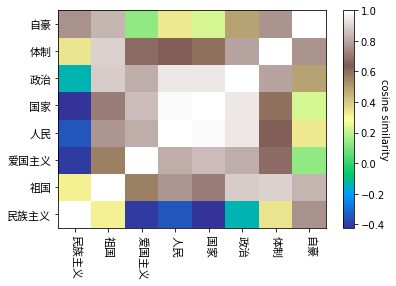

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(nationalistic_keywords, minor=False, rotation=270, fontproperties= fontprop)
a = ax.set_yticklabels(nationalistic_keywords, minor=False, fontproperties= fontprop)

This heat map shows “体制”（"political system"） (referring to that in China) has high cosine similarity with sentiments such as “自豪”（"proud"） and “政治”（"politics"）, suggesting the individual accounts in my corpus have positive sentiments toward the political system in China. The word "体制"（"political system"） also has high cosine similarity with "祖国"("home country/ mother land"). Also, words such as "国家" ("nation/country")and "人民" ("people") also have high cosine similarity with "政治" ("politics"). What's also interesting is that the heatmap shows "自豪" ("proud") and "爱国主义"("patriotim") have low cosine similarity (the score centers around zero), suggesting patriotism is not closely associatied sentiments that convery one's pride toward the country. 

From the heatmap, we can also see that "爱国主义" ("patriotism") and "人民"("people") and "国家" ("nation/country") have negative cosine similarity with "民族主义" （“natiaonlism”）.

In [0]:
# heatmap of tweets over the 9 years
targetdocs = [2012,2013,2014,2015,2016,2017,2018,2019,2020]
#targetMovs = wiki_df_2['Title'][:10]
heatmapMatrixD = []

for tagOuter in targetdocs:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetdocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

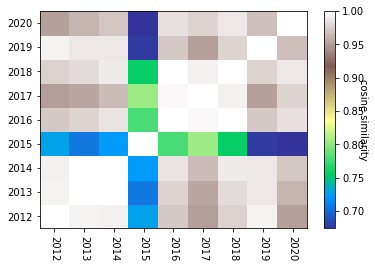

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetdocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetdocs, minor=False)

The heatmap indicates the documents from the year 2015 are most dissimilar with others. I wonder why. 

In [0]:
# heatmap of tweets over 9 years and keywords
heatmapMatrixC = []

for tagOuter in targetdocs:
    column = []
    tagVec = TweetsD2V_model.docvecs[tagOuter].reshape(1, -1)
    for tagInner in nationalistic_keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, TweetsD2V_model[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

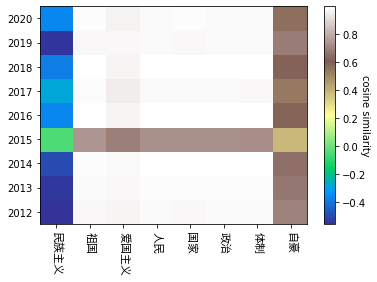

In [0]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(nationalistic_keywords, minor=False, rotation=270, fontproperties= fontprop)
a = ax.set_yticklabels(targetdocs, minor=False)

In [0]:
# ### if I can identify 3 set of keywords for each dimension of nationalism, I can draw the heatmap of years over the keywords for each dimension

## projection - use a dictionary and do the analysis again

perception of national politics (agreeable to not agreeable sentiments) - sentiments toward the government
group membership and identification (agreeable to not agreeable sentiments) - sentiments toward ethnic group
perception of other nation-states such as U.S., Japan (agreeable to not agreeable sentiments)

In [0]:
#tweets_W2V_model

In [0]:
#Word list to be projected onto the three dimensions
nations = ["中国","美国","日本","韩国","俄罗斯","伊朗","意大利","朝鲜","德国","英国","法国","西班牙","加拿大","葡萄牙","印度","越南"]


In [0]:
# word lists to create dimensions
targetword_list = ['富有','强大','富裕','有钱','富','好','发达','繁荣','衰败','苦','穷', '落后', '可怜','囧','差','不好','不够','负债', '公平','公正','透明','法制','自由','合理','强','弱','腐败','贪污','贿赂','独裁','丑闻','骗局','集权','审查',]

# words we will be mapping
targetword_list += nations

wordsSubMatrix = []
for word in targetword_list:
    wordsSubMatrix.append(tweets_W2V_model[word])
wordsSubMatrix = np.array(wordsSubMatrix)
#wordsSubMatrix

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
wordsSubMatrix

array([[ 0.01794834, -0.13002822, -0.1859183 , ...,  0.18149182,
         0.03836446,  0.00676159],
       [ 0.10163912, -0.11332846, -0.13943782, ..., -0.00551748,
         0.37999254,  0.14268038],
       [-0.18290168, -0.07697418,  0.01295296, ...,  0.05778351,
         0.04359556,  0.10046434],
       ...,
       [ 0.02108358, -0.00608083,  0.00807609, ...,  0.01238317,
        -0.05820643, -0.03111525],
       [-0.18301938, -0.14184813, -0.29193142, ...,  0.0680482 ,
         0.38586676,  0.20953295],
       [ 0.16967137, -0.03324532,  0.05804718, ..., -0.06351911,
         0.07088817,  0.07807863]], dtype=float32)

In [0]:
pcaWord = sklearn.decomposition.PCA(n_components = 34).fit(wordsSubMatrix)
reducedPCA_data = pcaWord.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWord = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

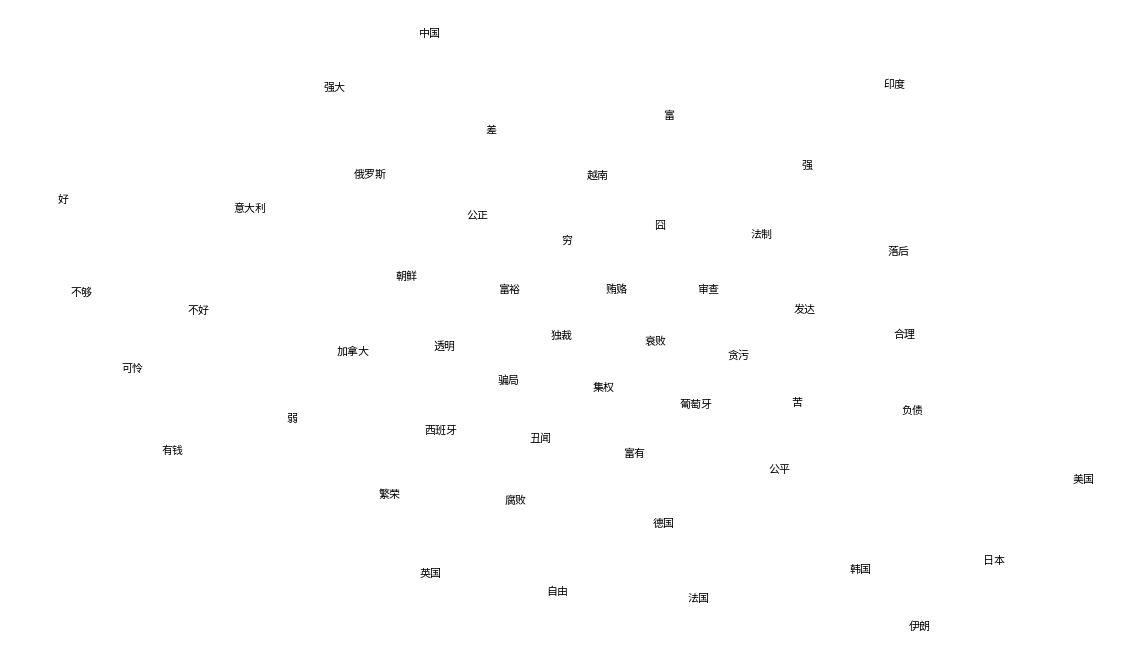

In [0]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWord[:, 0], tsneWord[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(targetword_list):
    ax.annotate(word, (tsneWord[:, 0][i],tsneWord[:, 1][i]), size =  50 * (len(targetword_list) - i) / len(targetword_list) + 10, fontproperties= fontprop)
plt.xticks(())
plt.yticks(())
plt.show()


In [0]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives]) #means whatever the model returns will be a vector
    return diff
# sum the normalized vector of each modeled word in positives list - sum of the normalized vector of each word in the negative list
# (X1+X2+X3) - (Y1+Y2+Y3)


In [0]:
# create 3 dimensions of natioanlism
economy =  dimension(tweets_W2V_model, ['富有','富裕','有钱','富','发达','繁荣'], ['衰败','苦','穷', '落后', '可怜','囧','差','不好','不够','负债'])
political_system = dimension(tweets_W2V_model, ['公平','公正','透明','法制','自由','合理','强'],['弱','腐败','贪污','贿赂','独裁','丑闻','骗局','集权','审查'])



# Gender = dimension(nytimes_model, ['man','him','he'], ['woman', 'her', 'she'])
# Race = dimension(nytimes_model, ['black','blacks','African'], ['white', 'whites', 'Caucasian'])
# Class = dimension(nytimes_model, ['rich', 'richer', 'richest', 'expensive', 'wealthy'], ['poor', 'poorer', 'poorest', 'cheap', 'inexpensive'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
###
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), economy.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), political_system.reshape(1,-1))[0][0])
        #c.append(sklearn.metrics.pairwise.cosine_similarity(tweets_W2V_model[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'economy': g, 'political_system': r}, index = word_list)
    return df
#to project each word in the word list, i.e. occupations, foods, sports, to the three dimensions (gender, race, class)


In [0]:
nation_df = makeDF(tweets_W2V_model, nations)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-

In [0]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim): #dim stands for dimension
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12, fontproperties= fontprop)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

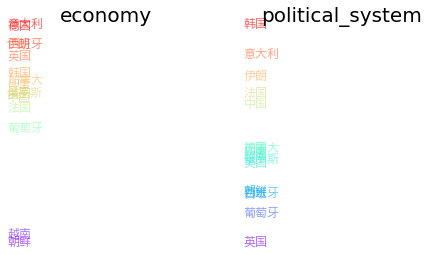

In [0]:
# plot nations on the dimension of economy
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, nation_df, 'economy')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, nation_df, 'political_system')
#ax3 = fig.add_subplot(133)
#PlotDimension(ax3, OCCdf, 'class')
plt.show()

I project the nation word list onto two dimension, i.e. economy and political system. The results is somewhat counterintuitive. On the economy dimension, the graph indicates that people in my weibo corpus seem to think Italy, Germany, and Iran are rich while Vietnam and North Korea are poor. On the political dimension, the freer, more democratic countries are South Korea while the most corrupted country is England (which does not seem to be making sense).

However, this analysis has several limitations. First, the words I used to create the political system and economy dimenisons are fairly arbitrary and subjective. To make the projection method work, I need to find a way to make the list of words I use more objective. For instance, I should consult a Chinese dictionary or theasaurus to refer to the synonyms associated with ”民主“ ("democratic"), for instance. Same for "集权" ("authoritarian")。 

Secondly, I should also make the dimension on something more narrow instead of political system, which is pretty broad and hard to create a dimension using positive words and negative words. For instance, instead of having a political system dimension, I could have a dimension along the line of "democratic" vs. "undemocratic"; a third dimension on "authoritarian" vs. "non-authoritarian". 

Thirdly, the less satisfactory result might be due to a small and unrepresentative sample. The results might reflect the sentiments and values of the corpus I have but can't be used to generalize the broader sentiments of the weibo population.

In [0]:
### likelihood score: who are likely to be nationalistic?

## linguistic change or difference


In [0]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [0]:
d2v_tweets_df_g.head()

all_normalized_tokens                                         taggedDocs
year nick_name                                                                                                      
2009 侯宁         [诱多, 成功, 终, 鱼儿, 咬, 钩, httpsinaurl, cn, htJGk, ...  ([诱多, 成功, 终, 鱼儿, 咬, 钩, httpsinaurl, cn, htJGk,...
     司马南        [删贴, 快, 贴文, 不止, ---, 纪念, 国庆, 60, 周年, 专文, 无, 过分...  ([删贴, 快, 贴文, 不止, ---, 纪念, 国庆, 60, 周年, 专文, 无, 过...
2010 侯宁         [2010, 车市, 大, 猜想, BuYaoDu, 蜀, 悍, 马路, httpsinau...  ([2010, 车市, 大, 猜想, BuYaoDu, 蜀, 悍, 马路, httpsina...
     李小萌        [泡, 儿, 泪点, 降到, 负值, 不能, 哭, 没, 哭, 评价, 一部, 作品, 2,...  ([泡, 儿, 泪点, 降到, 负值, 不能, 哭, 没, 哭, 评价, 一部, 作品, 2...
2011 侯宁         [支持, 俏江南, 红包, 今天, 俏江南, 应该, 免单, 新娘子, 露面, 好美, 心,...  ([支持, 俏江南, 红包, 今天, 俏江南, 应该, 免单, 新娘子, 露面, 好美, 心...

In [0]:
new_tweets_df.head()

,_id,crawl_time,weibo_url,user_id,created_at,tool,like_num,repost_num,comment_num,video_url,content,image_url,origin_weibo,location_map_info,year,nick_name,gender,province,label,tokenize_words,normalized_tokens
0,1980768563_Iw9dilFaJ,1583877534,https://weibo.com/1980768563/Iw9dilFaJ,1980768563,2020-02-27 16:37:00,真香警告,102,5,22,NaN,对了记得关注 还有工x号浮云,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[对, 了, 记得, 关注, , , 还有, 工, x, 号, 浮云]","[记得, 关注, 工, x, 号, 浮云]"
1,1980768563_Iy1lKeTGg,1583877534,https://weibo.com/1980768563/Iy1lKeTGg,1980768563,2020-03-10 00:16:00,iPhone XS Max,304,5,49,NaN,明天的更新已经差不多5000字了还要等明天更新数据以及补充更多信息2月24号第一条连140字...,NaN,NaN,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[明天, 的, 更新, 已经, 差不多, 5000, 字, 了, 还要, 等, 明天, 更新...","[明天, 更新, 已经, 差不多, 5000, 字, 还要, 明天, 更新, 数据, 补充,..."
2,1980768563_Iy1iKDvHR,1583877534,https://weibo.com/1980768563/Iy1iKDvHR,1980768563,2020-03-10 00:09:00,iPhone XS Max,266,609,15,https://m.weibo.cn/s/video/show?object_id=1034...,谢谢谢谢你们的奉献 这个视频真的很感人-ZH,NaN,https://weibo.cn/comment/Iy0c8sbD4?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[谢谢, 谢谢你们, 的, 奉献, , 这个, 视频, 真的, 很, 感人, -, ZH]","[谢谢, 谢谢你们, 奉献, 真的, 感人, ZH]"
3,1980768563_Iy19ymfjm,1583877534,https://weibo.com/1980768563/Iy19ymfjm,1980768563,2020-03-10 23:46:00,iPhone XS Max,607,30,83,NaN,欧洲尾盘反弹了原来是你艹这都能跳水从+3%跌到-2%了这口毒奶欧洲三大股没一个守住的股市冥灯...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[欧洲, 尾盘, 反弹, 了, 原来, 是, 你, 艹, 这, 都, 能, 跳水, 从, +...","[欧洲, 尾盘, 反弹, 原来, 艹, 跳水, 3%, 跌到, 2%, 这口, 毒奶, 欧洲..."
4,1980768563_Iy13sbx39,1583877534,https://weibo.com/1980768563/Iy13sbx39,1980768563,2020-03-10 23:31:00,iPhone XS Max,499,77,87,NaN,艹这都能跳水从+3%跌到-2%了这口毒奶欧洲三大股没一个守住的股市冥灯实锤了 美股高开低走感...,http://wx2.sinaimg.cn/wap180/76102133ly1gcoy17...,https://weibo.cn/comment/IxYxyB4EK?rl=1#cmtfrm,NaN,2020,霜叶,男,海外,"影评,移动互联网,商业","[艹, 这, 都, 能, 跳水, 从, +, 3%, 跌到, -, 2%, 了, 这口, 毒...","[艹, 跳水, 3%, 跌到, 2%, 这口, 毒奶, 欧洲, 三大股, 没, 守住, 股市..."


In [0]:

def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_tokens'], hs=1, negative = 0)
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned




In [0]:
rawEmbeddings, comparedEmbeddings = compareModels(new_tweets_df, 'year')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.wv.vectors_norm instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


In [0]:
print(comparedEmbeddings[2012])
print(sorted(set(new_tweets_df['year'])))

[<gensim.models.word2vec.Word2Vec object at 0x7fca5c704f60>, <gensim.models.word2vec.Word2Vec object at 0x7fca5749e710>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c69d358>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c709eb8>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f27b8>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2940>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2908>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f28d0>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2898>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2860>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2828>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f27f0>, <gensim.models.word2vec.Word2Vec object at 0x7fca5c4f2780>]
[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [0]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    print(word)
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

In [0]:
comparedEmbeddings[2012]


中国


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: 

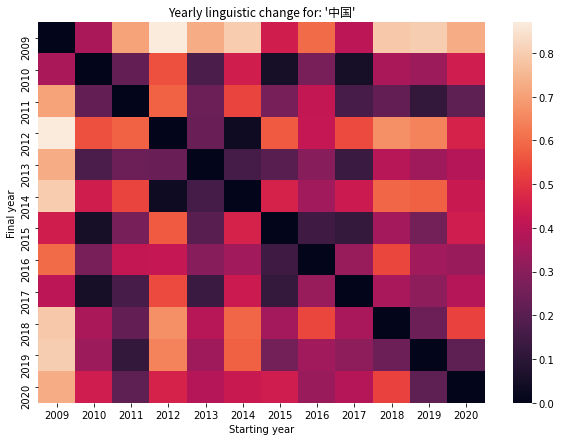

In [0]:
targetWord = '中国'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord), fontproperties= fontprop)
plt.show()

In [0]:
# targetWord = '美国'

# pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
# fig, ax = plt.subplots(figsize = (10, 7))
# sns.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
# ax.set_xlabel("Starting year")
# ax.set_ylabel("Final year")
# ax.set_ylabel("Final year")
# ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
# plt.show()

美国


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


KeyError: ignored